## Boolean Indexing

In [1]:
import pandas as pd
import numpy as np

In [2]:
movie = pd.read_csv('movie.csv', index_col='movie_title')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
movie_2_hours = movie['duration'] > 120
movie_2_hours.head(10)

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
John Carter                                    True
Spider-Man 3                                   True
Tangled                                       False
Avengers: Age of Ultron                        True
Harry Potter and the Half-Blood Prince         True
Name: duration, dtype: bool

In [4]:
movie_2_hours.sum()

1039

In [5]:
movie_2_hours.mean()

0.2113506916192026

In [6]:
movie['duration'].dropna().gt(120).mean()

0.21199755152009794

In [7]:
movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

In [8]:
actors = movie[['actor_1_facebook_likes','actor_2_facebook_likes']].dropna()
(actors['actor_1_facebook_likes'] >
actors['actor_2_facebook_likes']).mean()

0.9777687130328371

In [9]:
criteria1 = movie.imdb_score > 8
criteria2 = movie.content_rating == 'PG-13'
criteria3 = ((movie.title_year < 2000) |(movie.title_year > 2009))
criteria2.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: content_rating, dtype: bool

In [10]:
criteria_final = criteria1 & criteria2 & criteria3
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [11]:
crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = (movie.title_year < 2000) | (movie.title_year > 2009)
final_crit_a = crit_a1 & crit_a2 & crit_a3

In [12]:
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = ((movie.title_year >= 2000) & (movie.title_year <= 2010))
final_crit_b = crit_b1 & crit_b2 & crit_b3

In [13]:
final_crit_all = final_crit_a | final_crit_b
final_crit_all.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [14]:
movie[final_crit_all].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


In [15]:
cols = ['imdb_score', 'content_rating', 'title_year']
movie_filtered = movie.loc[final_crit_all, cols]
movie_filtered.head(10)

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
Inception,8.8,PG-13,2010.0
The Martian,8.1,PG-13,2015.0
Town & Country,4.4,R,2001.0
Sex and the City 2,4.3,R,2010.0


In [16]:
college = pd.read_csv('college.csv')
college[college['STABBR'] == 'TX'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [17]:
college2 = college.set_index('STABBR')
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [18]:
college = pd.read_csv('college.csv')
college2 = college.set_index('STABBR')
college2.index.is_monotonic

False

In [19]:
college3 = college2.sort_index()
college3.index.is_monotonic

True

In [20]:
%timeit college[college['STABBR'] == 'TX']

11.6 ms ± 861 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
%timeit college2.loc['TX']

6.05 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
%timeit college3.loc['TX']

2.27 ms ± 483 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
college_unique = college.set_index('INSTNM')
college_unique.index.is_unique

True

In [24]:
college[college['INSTNM'] == 'Stanford University']

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


In [25]:
college_unique.loc['Stanford University']

CITY                  Stanford
STABBR                      CA
HBCU                         0
MENONLY                      0
WOMENONLY                    0
RELAFFIL                     0
SATVRMID                   730
SATMTMID                   745
DISTANCEONLY                 0
UGDS                      7018
UGDS_WHITE              0.3752
UGDS_BLACK              0.0591
UGDS_HISP               0.1607
UGDS_ASIAN              0.1979
UGDS_AIAN               0.0114
UGDS_NHPI               0.0038
UGDS_2MOR               0.1067
UGDS_NRA                0.0819
UGDS_UNKN               0.0031
PPTUG_EF                     0
CURROPER                     1
PCTPELL                 0.1556
PCTFLOAN                0.1256
UG25ABV                 0.0401
MD_EARN_WNE_P10          86000
GRAD_DEBT_MDN_SUPP       12782
Name: Stanford University, dtype: object

In [26]:
college.index = college['CITY'] + ', ' + college['STABBR']
college = college.sort_index()
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"ARTESIA, CA",Angeles Institute,ARTESIA,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0175,0.0088,0.0088,0.0000,1,0.6275,0.8138,0.5429,NaN,16850
"Aberdeen, SD",Presentation College,Aberdeen,SD,0.0,0.0,0.0,1,440.0,480.0,0.0,...,0.0284,0.0142,0.0823,0.2865,1,0.4829,0.7560,0.3097,35900,25000
"Aberdeen, SD",Northern State University,Aberdeen,SD,0.0,0.0,0.0,0,480.0,475.0,0.0,...,0.0219,0.0425,0.0024,0.1872,1,0.2272,0.4303,0.1766,33600,24847
"Aberdeen, WA",Grays Harbor College,Aberdeen,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0937,0.0009,0.0250,0.1820,1,0.4530,0.1502,0.5087,27000,11490
"Abilene, TX",Hardin-Simmons University,Abilene,TX,0.0,0.0,0.0,1,508.0,515.0,0.0,...,0.0298,0.0159,0.0102,0.0685,1,0.3256,0.5547,0.0982,38700,25864


In [27]:
slb = pd.read_csv('slb_stock.csv', index_col='Date',
parse_dates=['Date'])
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [28]:
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles=[.1, .9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [29]:
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
criteria = (slb_close < lower_10) | (slb_close > upper_10)
slb_top_bottom_10 = slb_close[criteria]

AttributeError: module 'matplotlib' has no attribute 'hlines'

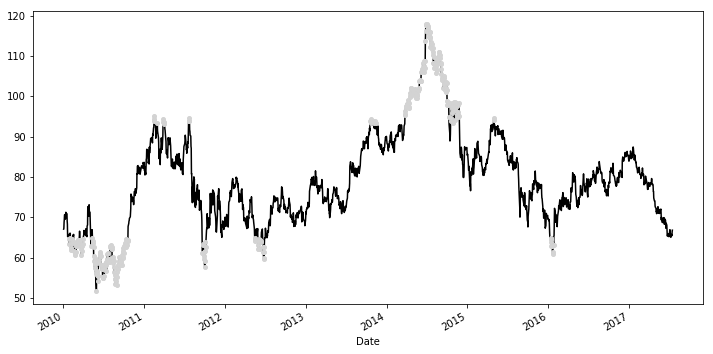

In [31]:
import matplotlib as plt
%matplotlib inline
slb_close.plot(color='black', figsize=(12,6))
slb_top_bottom_10.plot(marker='o', style=' ',
ms=4, color='lightgray')
xmin = criteria.index[0]
xmax = criteria.index[-1]
plt.hlines(y=[lower_10, upper_10], xmin=xmin,
xmax=xmax, color='black')

In [32]:
employee = pd.read_csv('employee.csv')
employee.DEPARTMENT.value_counts().head()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [33]:
employee.GENDER.value_counts()

Male      1397
Female     603
Name: GENDER, dtype: int64

In [34]:
employee.BASE_SALARY.describe().astype(int)

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int32

In [35]:
depts = ['Houston Police Department-HPD', 
             'Houston Fire Department (HFD)']
criteria_dept = employee.DEPARTMENT.isin(depts)
criteria_gender = employee.GENDER == 'Female'
criteria_sal = (employee.BASE_SALARY >= 80000) & (employee.BASE_SALARY <= 120000)

In [36]:
criteria_final = criteria_dept & criteria_gender & criteria_sal

In [37]:
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']
employee.loc[criteria_final, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


In [38]:
amzn = pd.read_csv('amzn_stock.csv', index_col='Date', parse_dates=['Date'])
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [39]:
amzn_daily_return = amzn.Close.pct_change()
amzn_daily_return.head()

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

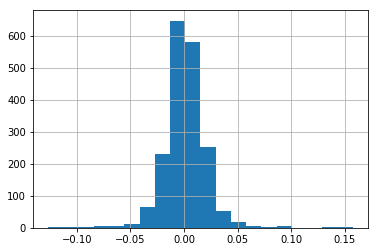

In [40]:
amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return.hist(bins=20)

In [41]:
mean = amzn_daily_return.mean()  
std = amzn_daily_return.std()

In [42]:
abs_z_score = amzn_daily_return.sub(mean).abs().div(std)

In [43]:
pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
print('{:.3f} fall within 1 standard deviation. '
      '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

0.787 fall within 1 standard deviation. 0.956 within 2 and 0.985 within 3


In [44]:
def test_return_normality(stock_data):
    close = stock_data['Close']
    daily_return = close.pct_change().dropna()
    daily_return.hist(bins=20)
    mean = daily_return.mean() 
    std = daily_return.std()
    
    abs_z_score = abs(daily_return - mean) / std
    pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]

    print('{:.3f} fall within 1 standard deviation. '
          '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

0.742 fall within 1 standard deviation. 0.946 within 2 and 0.986 within 3


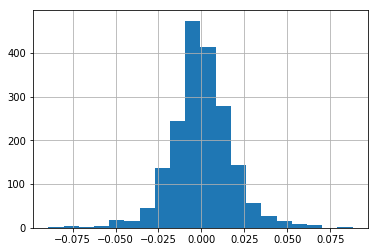

In [45]:
slb = pd.read_csv('slb_stock.csv', 
                  index_col='Date', parse_dates=['Date'])
test_return_normality(slb)

In [46]:
employee = pd.read_csv('employee.csv')
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']

In [47]:
qs = "DEPARTMENT in @depts " \
         "and GENDER == 'Female' " \
         "and 80000 <= BASE_SALARY <= 120000"
        
emp_filtered = employee.query(qs)
emp_filtered[select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


In [48]:
movie = pd.read_csv('movie.csv', index_col='movie_title')
fb_likes = movie['actor_1_facebook_likes'].dropna()
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [49]:
fb_likes.describe(percentiles=[.1, .25, .5, .75, .9]).astype(int)

count      4909
mean       6494
std       15106
min           0
10%         240
25%         607
50%         982
75%       11000
90%       18000
max      640000
Name: actor_1_facebook_likes, dtype: int32

In [50]:
fb_likes.describe(percentiles=[.1,.25,.5,.75,.9])

count      4909.000000
mean       6494.488491
std       15106.986884
min           0.000000
10%         240.000000
25%         607.000000
50%         982.000000
75%       11000.000000
90%       18000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

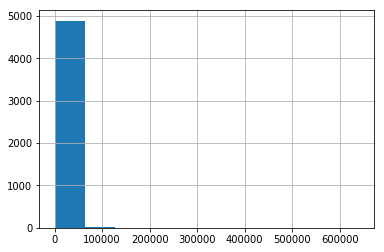

In [51]:
fb_likes.hist()

In [52]:
criteria_high = fb_likes < 20000
criteria_high.mean().round(2)

0.91

In [53]:
fb_likes.where(criteria_high).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [54]:
fb_likes.where(criteria_high, other=20000).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [55]:
criteria_low = fb_likes > 300
fb_likes_cap = fb_likes.where(criteria_high, other=20000)\
                       .where(criteria_low, 300)
fb_likes_cap.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

In [56]:
len(fb_likes), len(fb_likes_cap)

(4909, 4909)

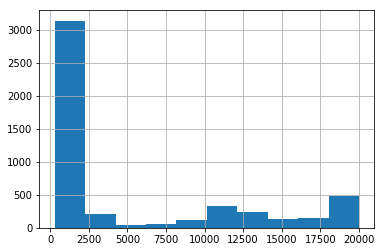

In [57]:
fb_likes_cap.hist()

In [58]:
fb_likes_cap2 = fb_likes.clip(lower=300, upper=20000)
fb_likes_cap2.equals(fb_likes_cap)

True

In [59]:
movie = pd.read_csv('movie.csv', index_col='movie_title')
c1 = movie['title_year'] >= 2010
c2 = movie['title_year'].isnull()
criteria = c1 | c2

In [60]:
movie.mask(criteria).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spectre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Dark Knight Rises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
movie_mask = movie.mask(criteria).dropna(how='all')
movie_mask.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0.0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000.0
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0.0


In [62]:
movie_boolean = movie[movie['title_year'] < 2010]
movie_boolean.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0


In [63]:
movie_mask.equals(movie_boolean)

False

In [64]:
movie_mask.shape == movie_boolean.shape

True

In [65]:
movie_mask.dtypes == movie_boolean.dtypes

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                        True
actor_1_name                  True
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link               True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                    True
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [66]:
movie = pd.read_csv('movie.csv', index_col='movie_title')
c1 = movie['content_rating'] == 'G'
c2 = movie['imdb_score'] < 4
criteria = c1 & c2

In [67]:
movie_loc = movie.loc[criteria]
movie_loc.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000


In [68]:
movie_loc.equals(movie[criteria])

True

In [69]:
movie_iloc = movie.iloc[criteria.values]

In [70]:
movie_iloc.equals(movie_loc)

True

In [71]:
movie.loc[criteria.values]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000
Sunday School Musical,Color,Rachel Goldenberg,5.0,93.0,7.0,73.0,Mark Hengst,349.0,NaN,Drama|Musical,...,18.0,English,USA,G,NaN,2008.0,168.0,2.5,1.85,777


In [72]:
criteria_col = movie.dtypes == np.int64
criteria_col.head()

color                      False
director_name              False
num_critic_for_reviews     False
duration                   False
director_facebook_likes    False
dtype: bool

In [73]:
movie.loc[:, criteria_col].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [74]:
movie.iloc[:, criteria_col.values].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [75]:
cols = ['content_rating', 'imdb_score', 'title_year', 'gross']
movie.loc[criteria, cols].sort_values('imdb_score')

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0


In [76]:
col_index = [movie.columns.get_loc(col) for col in cols]
col_index

[20, 24, 22, 8]

In [77]:
movie.iloc[criteria.values, col_index].sort_values('imdb_score')

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0


In [78]:
columns = college.columns
columns

Index(['INSTNM', 'CITY', 'STABBR', 'HBCU', 'MENONLY', 'WOMENONLY', 'RELAFFIL',
       'SATVRMID', 'SATMTMID', 'DISTANCEONLY', 'UGDS', 'UGDS_WHITE',
       'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI',
       'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'PPTUG_EF', 'CURROPER', 'PCTPELL',
       'PCTFLOAN', 'UG25ABV', 'MD_EARN_WNE_P10', 'GRAD_DEBT_MDN_SUPP'],
      dtype='object')

In [79]:
columns.values

array(['INSTNM', 'CITY', 'STABBR', 'HBCU', 'MENONLY', 'WOMENONLY',
       'RELAFFIL', 'SATVRMID', 'SATMTMID', 'DISTANCEONLY', 'UGDS',
       'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN',
       'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'PPTUG_EF',
       'CURROPER', 'PCTPELL', 'PCTFLOAN', 'UG25ABV', 'MD_EARN_WNE_P10',
       'GRAD_DEBT_MDN_SUPP'], dtype=object)

In [80]:
columns[5]

'WOMENONLY'

In [81]:
columns[[1,8,10]]

Index(['CITY', 'SATMTMID', 'UGDS'], dtype='object')

In [82]:
columns[-7:-4]

Index(['PPTUG_EF', 'CURROPER', 'PCTPELL'], dtype='object')

In [83]:
columns.min(), columns.max(), columns.isnull().sum()

('CITY', 'WOMENONLY', 0)

In [84]:
columns + '_A'

Index(['INSTNM_A', 'CITY_A', 'STABBR_A', 'HBCU_A', 'MENONLY_A', 'WOMENONLY_A',
       'RELAFFIL_A', 'SATVRMID_A', 'SATMTMID_A', 'DISTANCEONLY_A', 'UGDS_A',
       'UGDS_WHITE_A', 'UGDS_BLACK_A', 'UGDS_HISP_A', 'UGDS_ASIAN_A',
       'UGDS_AIAN_A', 'UGDS_NHPI_A', 'UGDS_2MOR_A', 'UGDS_NRA_A',
       'UGDS_UNKN_A', 'PPTUG_EF_A', 'CURROPER_A', 'PCTPELL_A', 'PCTFLOAN_A',
       'UG25ABV_A', 'MD_EARN_WNE_P10_A', 'GRAD_DEBT_MDN_SUPP_A'],
      dtype='object')

In [85]:
columns > 'G'

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True])

In [86]:
s1 = pd.Series(index=list('aaab'), data=np.arange(4))
s1

a    0
a    1
a    2
b    3
dtype: int32

In [87]:
s2 = pd.Series(index=list('cababb'), data=np.arange(6))
s2

c    0
a    1
b    2
a    3
b    4
b    5
dtype: int32

In [88]:
>>> s1 + s2

a    1.0
a    3.0
a    2.0
a    4.0
a    3.0
a    5.0
b    5.0
b    7.0
b    8.0
c    NaN
dtype: float64

In [89]:
employee = pd.read_csv('employee.csv', index_col='RACE')
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
RACE,,,,,,,,,
Hispanic/Latino,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Full Time,Female,Active,2006-06-12,2012-10-13
Hispanic/Latino,1,LIBRARY ASSISTANT,Library,26125.0,Full Time,Female,Active,2000-07-19,2010-09-18
White,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,Full Time,Male,Active,2015-02-03,2015-02-03
White,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,Full Time,Male,Active,1982-02-08,1991-05-25
White,4,ELECTRICIAN,General Services Department,56347.0,Full Time,Male,Active,1989-06-19,1994-10-22


In [90]:
salary1 = employee['BASE_SALARY']
salary2 = employee['BASE_SALARY']
salary1 is salary2

True

In [91]:
salary1 = employee['BASE_SALARY'].copy()
salary2 = employee['BASE_SALARY'].copy()
salary1 is salary2

False

In [92]:
salary1 = salary1.sort_index()
salary1.head()

RACE
American Indian or Alaskan Native    78355.0
American Indian or Alaskan Native    26125.0
American Indian or Alaskan Native    98536.0
American Indian or Alaskan Native        NaN
American Indian or Alaskan Native    55461.0
Name: BASE_SALARY, dtype: float64

In [93]:
salary2.head()

RACE
Hispanic/Latino    121862.0
Hispanic/Latino     26125.0
White               45279.0
White               63166.0
White               56347.0
Name: BASE_SALARY, dtype: float64

In [94]:
salary_add = salary1 + salary2
salary_add.head()

RACE
American Indian or Alaskan Native    138702.0
American Indian or Alaskan Native    156710.0
American Indian or Alaskan Native    176891.0
American Indian or Alaskan Native    159594.0
American Indian or Alaskan Native    127734.0
Name: BASE_SALARY, dtype: float64

In [95]:
salary_add1 = salary1 + salary1
len(salary1), len(salary2), len(salary_add), len(salary_add1)

(2000, 2000, 1175424, 2000)

In [96]:
index_vc = salary1.index.value_counts(dropna=False)
index_vc

Black or African American            700
White                                665
Hispanic/Latino                      480
Asian/Pacific Islander               107
NaN                                   35
American Indian or Alaskan Native     11
Others                                 2
Name: RACE, dtype: int64

In [97]:
index_vc.pow(2).sum()

1175424

In [98]:
 baseball_14 = pd.read_csv('data/baseball14.csv',
index_col='playerID')
baseball_15 = pd.read_csv('data/baseball15.csv',
index_col='playerID')
baseball_16 = pd.read_csv('data/baseball16.csv',
index_col='playerID')
baseball_14.head()

FileNotFoundError: File b'data/baseball14.csv' does not exist

In [ ]:
baseball_14.index.difference(baseball_15.index)

In [ ]:
baseball_14.index.difference(baseball_16.index)

In [99]:
hits_14 = baseball_14['H']
hits_15 = baseball_15['H']
hits_16 = baseball_16['H']
hits_14.head()

NameError: name 'baseball_14' is not defined

In [100]:
(hits_14 + hits_15).head()

NameError: name 'hits_14' is not defined

In [ ]:
hits_14.add(hits_15, fill_value=0).head()

In [ ]:
hits_total = hits_14.add(hits_15, fill_value=0) \
.add(hits_16, fill_value=0)

In [101]:
hits_total.hasnans

NameError: name 'hits_total' is not defined

In [102]:
employee = pd.read_csv('employee.csv')
dept_sal = employee[['DEPARTMENT', 'BASE_SALARY']]

In [103]:
dept_sal = dept_sal.sort_values(['DEPARTMENT', 'BASE_SALARY'],
ascending=[True, False])

In [104]:
max_dept_sal = dept_sal.drop_duplicates(subset='DEPARTMENT')
max_dept_sal.head()

,DEPARTMENT,BASE_SALARY
1494,Admn. & Regulatory Affairs,140416.0
149,City Controller's Office,64251.0
236,City Council,100000.0
647,Convention and Entertainment,38397.0
1500,Dept of Neighborhoods (DON),89221.0


In [105]:
max_dept_sal = max_dept_sal.set_index('DEPARTMENT')
employee = employee.set_index('DEPARTMENT')

In [106]:
employee['MAX_DEPT_SALARY'] = max_dept_sal['BASE_SALARY']
employee.head()

,UNIQUE_ID,POSITION_TITLE,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,MAX_DEPT_SALARY
DEPARTMENT,,,,,,,,,,
Municipal Courts Department,0,ASSISTANT DIRECTOR (EX LVL),121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,121862.0
Library,1,LIBRARY ASSISTANT,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,107763.0
Houston Police Department-HPD,2,POLICE OFFICER,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03,199596.0
Houston Fire Department (HFD),3,ENGINEER/OPERATOR,63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25,210588.0
General Services Department,4,ELECTRICIAN,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22,89194.0


In [107]:
employee.query('BASE_SALARY > MAX_DEPT_SALARY')

,UNIQUE_ID,POSITION_TITLE,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,MAX_DEPT_SALARY
DEPARTMENT,,,,,,,,,,


In [108]:
college = pd.read_csv('college.csv', index_col='INSTNM')
college.dtypes

CITY                   object
STABBR                 object
HBCU                  float64
MENONLY               float64
WOMENONLY             float64
RELAFFIL                int64
SATVRMID              float64
SATMTMID              float64
DISTANCEONLY          float64
UGDS                  float64
UGDS_WHITE            float64
UGDS_BLACK            float64
UGDS_HISP             float64
UGDS_ASIAN            float64
UGDS_AIAN             float64
UGDS_NHPI             float64
UGDS_2MOR             float64
UGDS_NRA              float64
UGDS_UNKN             float64
PPTUG_EF              float64
CURROPER                int64
PCTPELL               float64
PCTFLOAN              float64
UG25ABV               float64
MD_EARN_WNE_P10        object
GRAD_DEBT_MDN_SUPP     object
dtype: object

In [109]:
college.MD_EARN_WNE_P10.iloc[0]

'30300'

In [110]:
college.GRAD_DEBT_MDN_SUPP.iloc[0]

'33888'

In [111]:
college.MD_EARN_WNE_P10.sort_values(ascending=False).head()

INSTNM
Sharon Regional Health System School of Nursing    PrivacySuppressed
Northcoast Medical Training Academy                PrivacySuppressed
Success Schools                                    PrivacySuppressed
Louisiana Culinary Institute                       PrivacySuppressed
Bais Medrash Toras Chesed                          PrivacySuppressed
Name: MD_EARN_WNE_P10, dtype: object

In [112]:
cols = ['MD_EARN_WNE_P10', 'GRAD_DEBT_MDN_SUPP']
for col in cols:
    college[col] = pd.to_numeric(college[col], errors='coerce')
college.dtypes.loc[cols]

MD_EARN_WNE_P10       float64
GRAD_DEBT_MDN_SUPP    float64
dtype: object

In [113]:
college_n = college.select_dtypes(include=[np.number])
college_n.head()

,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,0.0333,0.9353,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300.0,33888.0
University of Alabama at Birmingham,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,0.5922,0.2600,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700.0,21941.5
Amridge University,0.0,0.0,0.0,1,NaN,NaN,1.0,291.0,0.2990,0.4192,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100.0,23370.0
University of Alabama in Huntsville,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,0.6988,0.1255,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500.0,24097.0
Alabama State University,1.0,0.0,0.0,0,425.0,430.0,0.0,4811.0,0.0158,0.9208,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600.0,33118.5


In [114]:
criteria = college_n.nunique() == 2
criteria.head()

HBCU          True
MENONLY       True
WOMENONLY     True
RELAFFIL      True
SATVRMID     False
dtype: bool

In [115]:
binary_cols = college_n.columns[criteria].tolist()
binary_cols

['HBCU', 'MENONLY', 'WOMENONLY', 'RELAFFIL', 'DISTANCEONLY', 'CURROPER']

In [116]:
college_n2 = college_n.drop(labels=binary_cols, axis='columns')
college_n2.head()

,SATVRMID,SATMTMID,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,
Alabama A & M University,424.0,420.0,4206.0,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138,0.0656,0.7356,0.8284,0.1049,30300.0,33888.0
University of Alabama at Birmingham,570.0,565.0,11383.0,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100,0.2607,0.3460,0.5214,0.2422,39700.0,21941.5
Amridge University,NaN,NaN,291.0,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715,0.4536,0.6801,0.7795,0.8540,40100.0,23370.0
University of Alabama in Huntsville,595.0,590.0,5451.0,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350,0.2146,0.3072,0.4596,0.2640,45500.0,24097.0
Alabama State University,425.0,430.0,4811.0,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137,0.0892,0.7347,0.7554,0.1270,26600.0,33118.5


In [117]:
max_cols = college_n2.idxmax()
max_cols

SATVRMID                             California Institute of Technology
SATMTMID                             California Institute of Technology
UGDS                                      University of Phoenix-Arizona
UGDS_WHITE                       Mr Leon's School of Hair Design-Moscow
UGDS_BLACK                           Velvatex College of Beauty Culture
UGDS_HISP                       Thunderbird School of Global Management
UGDS_ASIAN                          Cosmopolitan Beauty and Tech School
UGDS_AIAN                             Haskell Indian Nations University
UGDS_NHPI                                       Palau Community College
UGDS_2MOR                                                 LIU Brentwood
UGDS_NRA               California University of Management and Sciences
UGDS_UNKN             Le Cordon Bleu College of Culinary Arts-San Fr...
PPTUG_EF                        Thunderbird School of Global Management
PCTPELL                                        MTI Business Coll

In [118]:
unique_max_cols = max_cols.unique()
unique_max_cols[:5]

array(['California Institute of Technology',
       'University of Phoenix-Arizona',
       "Mr Leon's School of Hair Design-Moscow",
       'Velvatex College of Beauty Culture',
       'Thunderbird School of Global Management'], dtype=object)

In [119]:
college_n2.loc[unique_max_cols].style.highlight_max()

,SATVRMID,SATMTMID,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,
California Institute of Technology,765,785,983,0.2787,0.0153,0.1221,0.4385,0.001,0,0.057,0.0875,0,0,0.1126,0.2303,0.0082,77800,11812.5
University of Phoenix-Arizona,nan,nan,151558,0.3098,0.1555,0.076,0.0082,0.0042,0.005,0.1131,0.0131,0.3152,0,0.6009,0.592,nan,nan,33000
Mr Leon's School of Hair Design-Moscow,nan,nan,16,1,0,0,0,0,0,0,0,0,0,0.625,0.625,0.2,nan,15710
Velvatex College of Beauty Culture,nan,nan,25,0,1,0,0,0,0,0,0,0,0.2,0.7692,0,0.52,nan,nan
Thunderbird School of Global Management,nan,nan,1,0,0,1,0,0,0,0,0,0,1,0,0,0,118900,nan
Cosmopolitan Beauty and Tech School,nan,nan,110,0.0091,0,0.0182,0.9727,0,0,0,0,0,0.3182,0.7761,0.1244,0.9545,nan,nan
Haskell Indian Nations University,430,440,805,0,0,0,0,1,0,0,0,0,0.0224,0.8396,0,0.2089,22800,nan
Palau Community College,nan,nan,602,0,0.0017,0,0,0,0.9983,0,0,0,0.3887,0.856,0,0.2616,24700,nan
LIU Brentwood,nan,nan,15,0,0.1333,0.2667,0,0,0,0.5333,0,0.0667,0.4,0.5652,0.7826,0.7826,44600,25499


In [120]:
college = pd.read_csv('college.csv', index_col='INSTNM')
college_ugds = college.filter(like='UGDS_').head()
college_ugds.style.highlight_max(axis='columns')

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.26,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.01
Amridge University,0.299,0.4192,0.0069,0.0034,0,0,0,0,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.035
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.001,0.0006,0.0098,0.0243,0.0137


In [121]:
college = pd.read_csv('college.csv', index_col='INSTNM')
cols = ['MD_EARN_WNE_P10', 'GRAD_DEBT_MDN_SUPP']
for col in cols:
    college[col] = pd.to_numeric(college[col], errors='coerce')
college_n = college.select_dtypes(include=[np.number])
criteria = college_n.nunique() == 2
binary_cols = college_n.columns[criteria].tolist()
college_n = college_n.drop(labels=binary_cols, axis='columns')

In [122]:
college_n.max().head()

SATVRMID         765.0
SATMTMID         785.0
UGDS          151558.0
UGDS_WHITE         1.0
UGDS_BLACK         1.0
dtype: float64

In [123]:
college_n.eq(college_n.max()).head()

,SATVRMID,SATMTMID,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,
Alabama A & M University,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
University of Alabama at Birmingham,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Amridge University,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
University of Alabama in Huntsville,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Alabama State University,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [124]:
has_row_max = college_n.eq(college_n.max()).any(axis='columns')
has_row_max.head()

INSTNM
Alabama A & M University               False
University of Alabama at Birmingham    False
Amridge University                     False
University of Alabama in Huntsville    False
Alabama State University               False
dtype: bool

In [125]:
college_n.shape

(7535, 18)

In [126]:
has_row_max.sum()

401

In [127]:
college_n.eq(college_n.max()).cumsum()

,SATVRMID,SATMTMID,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,
Alabama A & M University,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
University of Alabama at Birmingham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Amridge University,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
University of Alabama in Huntsville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Alabama State University,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
The University of Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Central Alabama Community College,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Athens State University,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Auburn University at Montgomery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
has_row_max2 = college_n.eq(college_n.max()).cumsum().cumsum().eq(1).any(axis='columns')

has_row_max2.head()

INSTNM
Alabama A & M University               False
University of Alabama at Birmingham    False
Amridge University                     False
University of Alabama in Huntsville    False
Alabama State University               False
dtype: bool

In [129]:
has_row_max2.sum()

16

In [130]:
idxmax_cols = has_row_max2[has_row_max2].index
idxmax_cols

Index(['Thunderbird School of Global Management',
       'Southwest University of Visual Arts-Tucson', 'ABC Beauty College Inc',
       'Velvatex College of Beauty Culture',
       'California Institute of Technology',
       'Le Cordon Bleu College of Culinary Arts-San Francisco',
       'MTI Business College Inc', 'Dongguk University-Los Angeles',
       'Mr Leon's School of Hair Design-Moscow',
       'Haskell Indian Nations University', 'LIU Brentwood',
       'Medical College of Wisconsin', 'Palau Community College',
       'California University of Management and Sciences',
       'Cosmopolitan Beauty and Tech School', 'University of Phoenix-Arizona'],
      dtype='object', name='INSTNM')

In [131]:
set(college_n.idxmax().unique()) == set(idxmax_cols)

True

In [132]:
college = pd.read_csv('college.csv', index_col='INSTNM')
college_ugds = college.filter(like='UGDS_')
college_ugds.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


In [133]:
highest_percentage_race = college_ugds.idxmax(axis='columns')
highest_percentage_race.head()

INSTNM
Alabama A & M University               UGDS_BLACK
University of Alabama at Birmingham    UGDS_WHITE
Amridge University                     UGDS_BLACK
University of Alabama in Huntsville    UGDS_WHITE
Alabama State University               UGDS_BLACK
dtype: object

In [134]:
highest_percentage_race.value_counts(normalize=True)

UGDS_WHITE    0.670352
UGDS_BLACK    0.151586
UGDS_HISP     0.129473
UGDS_UNKN     0.023422
UGDS_ASIAN    0.012074
UGDS_AIAN     0.006110
UGDS_NRA      0.004073
UGDS_NHPI     0.001746
UGDS_2MOR     0.001164
dtype: float64

In [135]:
flights = pd.read_csv('flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [136]:
flights.groupby('AIRLINE').agg({'ARR_DELAY':'mean'}).head()

,ARR_DELAY
AIRLINE,
AA,5.542661
AS,-0.833333
B6,8.692593
DL,0.339691
EV,7.034580


In [137]:
flights.groupby('AIRLINE')['ARR_DELAY'].agg('mean').head()

AIRLINE
AA    5.542661
AS   -0.833333
B6    8.692593
DL    0.339691
EV    7.034580
Name: ARR_DELAY, dtype: float64

In [138]:
flights.groupby('AIRLINE')['ARR_DELAY'].agg(np.mean).head()

AIRLINE
AA    5.542661
AS   -0.833333
B6    8.692593
DL    0.339691
EV    7.034580
Name: ARR_DELAY, dtype: float64

In [139]:
flights.groupby('AIRLINE')['ARR_DELAY'].mean().head()

AIRLINE
AA    5.542661
AS   -0.833333
B6    8.692593
DL    0.339691
EV    7.034580
Name: ARR_DELAY, dtype: float64

In [140]:
flights.groupby(['AIRLINE', 'WEEKDAY'])['CANCELLED'].agg('sum').head(7)

AIRLINE  WEEKDAY
AA       1          41
         2           9
         3          16
         4          20
         5          18
         6          21
         7          29
Name: CANCELLED, dtype: int64

In [141]:
flights.groupby(['AIRLINE', 'WEEKDAY'])['CANCELLED', 'DIVERTED'].agg(['sum', 'mean']).head(7)

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
        6              21  0.018667        9  0.008000
        7              29  0.021837        1  0.000753

In [142]:
group_cols = ['ORG_AIR', 'DEST_AIR']
agg_dict = {'CANCELLED':['sum', 'mean', 'size'],
'AIR_TIME':['mean', 'var']}
flights.groupby(group_cols).agg(agg_dict).head()

CANCELLED              AIR_TIME           
                       sum mean size        mean        var
ORG_AIR DEST_AIR                                           
ATL     ABE              0  0.0   31   96.387097  45.778495
        ABQ              0  0.0   16  170.500000  87.866667
        ABY              0  0.0   19   28.578947   6.590643
        ACY              0  0.0    6   91.333333  11.466667
        AEX              0  0.0   40   78.725000  47.332692

In [144]:
flights = pd.read_csv('flights.csv')
airline_info = flights.groupby(['AIRLINE', 'WEEKDAY'])\
.agg({'DIST':['sum', 'mean'],
'ARR_DELAY':['min', 'max']}) \
.astype(int)
airline_info.head(7)

DIST       ARR_DELAY     
                     sum  mean       min  max
AIRLINE WEEKDAY                              
AA      1        1455386  1139       -60  551
        2        1358256  1107       -52  725
        3        1496665  1117       -45  473
        4        1452394  1089       -46  349
        5        1427749  1122       -41  732
        6        1265340  1124       -50  858
        7        1461906  1100       -49  626

In [145]:
level0 = airline_info.columns.get_level_values(0)


In [146]:
level1 = airline_info.columns.get_level_values(1)

In [147]:
airline_info.columns = level0 + '_' + level1
airline_info.head(7)
                  

DIST_sum  DIST_mean  ARR_DELAY_min  ARR_DELAY_max
AIRLINE WEEKDAY                                                   
AA      1         1455386       1139            -60            551
        2         1358256       1107            -52            725
        3         1496665       1117            -45            473
        4         1452394       1089            -46            349
        5         1427749       1122            -41            732
        6         1265340       1124            -50            858
        7         1461906       1100            -49            626

In [148]:
airline_info.reset_index().head(7)

,AIRLINE,WEEKDAY,DIST_sum,DIST_mean,ARR_DELAY_min,ARR_DELAY_max
0,AA,1,1455386,1139,-60,551
1,AA,2,1358256,1107,-52,725
2,AA,3,1496665,1117,-45,473
3,AA,4,1452394,1089,-46,349
4,AA,5,1427749,1122,-41,732
5,AA,6,1265340,1124,-50,858
6,AA,7,1461906,1100,-49,626


In [149]:
college = pd.read_csv('college.csv')
college.groupby('STABBR')['UGDS'].agg(['mean', 'std']) \
.round(0).head()

,mean,std
STABBR,,
AK,2493.0,4052.0
AL,2790.0,4658.0
AR,1644.0,3143.0
AS,1276.0,NaN
AZ,4130.0,14894.0


In [150]:
def max_deviation(s):
    std_score = (s - s.mean()) / s.std()
    return std_score.abs().max()

In [151]:
college.groupby('STABBR')['UGDS'].agg(max_deviation) \
.round(1).head()

STABBR
AK    2.6
AL    5.8
AR    6.3
AS    NaN
AZ    9.9
Name: UGDS, dtype: float64

In [154]:
college = pd.read_csv('college.csv')
grouped = college.groupby(['STABBR', 'RELAFFIL'])
import inspect
inspect.signature(grouped.agg)

<Signature (arg, *args, **kwargs)>

In [155]:
def pct_between_1_3k(s):
    return s.between(1000, 3000).mean()

In [156]:
college.groupby(['STABBR', 'RELAFFIL'])['UGDS'] \
.agg(pct_between_1_3k).head(9)

STABBR  RELAFFIL
AK      0           0.142857
        1           0.000000
AL      0           0.236111
        1           0.333333
AR      0           0.279412
        1           0.111111
AS      0           1.000000
AZ      0           0.096774
        1           0.000000
Name: UGDS, dtype: float64

In [157]:
def pct_between(s, low, high):
    return s.between(low, high).mean()

In [158]:
college.groupby(['STABBR', 'RELAFFIL'])['UGDS'] \
.agg(pct_between, 1000, 10000).head(9)

STABBR  RELAFFIL
AK      0           0.428571
        1           0.000000
AL      0           0.458333
        1           0.375000
AR      0           0.397059
        1           0.166667
AS      0           1.000000
AZ      0           0.233871
        1           0.111111
Name: UGDS, dtype: float64

In [160]:
college = pd.read_csv('college.csv')
grouped = college.groupby(['STABBR', 'RELAFFIL'])
type(grouped)

pandas.core.groupby.DataFrameGroupBy

In [161]:
print([attr for attr in dir(grouped) if not attr.startswith('_')])

['CITY', 'CURROPER', 'DISTANCEONLY', 'GRAD_DEBT_MDN_SUPP', 'HBCU', 'INSTNM', 'MD_EARN_WNE_P10', 'MENONLY', 'PCTFLOAN', 'PCTPELL', 'PPTUG_EF', 'RELAFFIL', 'SATMTMID', 'SATVRMID', 'STABBR', 'UG25ABV', 'UGDS', 'UGDS_2MOR', 'UGDS_AIAN', 'UGDS_ASIAN', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_NHPI', 'UGDS_NRA', 'UGDS_UNKN', 'UGDS_WHITE', 'WOMENONLY', 'agg', 'aggregate', 'all', 'any', 'apply', 'backfill', 'bfill', 'boxplot', 'corr', 'corrwith', 'count', 'cov', 'cumcount', 'cummax', 'cummin', 'cumprod', 'cumsum', 'describe', 'diff', 'dtypes', 'expanding', 'ffill', 'fillna', 'filter', 'first', 'get_group', 'groups', 'head', 'hist', 'idxmax', 'idxmin', 'indices', 'last', 'mad', 'max', 'mean', 'median', 'min', 'ndim', 'ngroup', 'ngroups', 'nth', 'nunique', 'ohlc', 'pad', 'pct_change', 'pipe', 'plot', 'prod', 'quantile', 'rank', 'resample', 'rolling', 'sem', 'shift', 'size', 'skew', 'std', 'sum', 'tail', 'take', 'transform', 'tshift', 'var']


In [162]:
grouped.ngroups

112

In [163]:
groups = list(grouped.groups.keys())
groups[:6]

[('AK', 0), ('AK', 1), ('AL', 0), ('AL', 1), ('AR', 0), ('AR', 1)]

In [164]:
grouped.get_group(('FL', 1)).head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
712,The Baptist College of Florida,Graceville,FL,0.0,0.0,0.0,1,545.0,465.0,0.0,...,0.0308,0.0000,0.0507,0.2291,1,0.5878,0.5602,0.3531,30800,20052
713,Barry University,Miami,FL,0.0,0.0,0.0,1,470.0,462.0,0.0,...,0.0164,0.0741,0.0841,0.1518,1,0.5045,0.6733,0.4361,44100,28250
714,Gooding Institute of Nurse Anesthesia,Panama City,FL,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,PrivacySuppressed
715,Bethune-Cookman University,Daytona Beach,FL,1.0,0.0,0.0,1,405.0,395.0,0.0,...,0.0198,0.0205,0.0190,0.0523,1,0.7758,0.8867,0.0647,29400,36250
724,Johnson University Florida,Kissimmee,FL,0.0,0.0,0.0,1,480.0,470.0,0.0,...,0.0045,0.0045,0.0136,0.1636,1,0.6689,0.7384,0.2185,26300,20199


In [165]:
from IPython.display import display
for name, group in grouped:
    print(name)
    display(group.head(3))

('AK', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
60,University of Alaska Anchorage,Anchorage,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0980,0.0181,0.0457,0.4539,1,0.2385,0.2647,0.4386,42500,19449.5
62,University of Alaska Fairbanks,Fairbanks,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0401,0.0110,0.3060,0.3887,1,0.2263,0.2550,0.4519,36200,19355
63,University of Alaska Southeast,Juneau,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0686,0.0049,0.2241,0.5112,1,0.1769,0.1996,0.5550,37400,16875


('AK', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
61,Alaska Bible College,Palmer,AK,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0370,0.0,0.0000,0.1481,1,0.3571,0.2857,0.4286,NaN,PrivacySuppressed
64,Alaska Pacific University,Anchorage,AK,0.0,0.0,0.0,1,555.0,503.0,0.0,...,0.0945,0.0,0.0873,0.3745,1,0.3152,0.5297,0.4910,47000,23250
5417,Alaska Christian College,Soldotna,AK,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0147,0.0,0.1324,0.0735,1,0.8868,0.6792,0.2264,NaN,PrivacySuppressed


('AL', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097


('AL', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
10,Birmingham Southern College,Birmingham,AL,0.0,0.0,0.0,1,560.0,560.0,0.0,...,0.0051,0.0000,0.0051,0.0017,1,0.1920,0.4809,0.0152,44200,27000
12,Concordia College Alabama,Selma,AL,1.0,0.0,0.0,1,420.0,400.0,0.0,...,0.0031,0.0466,0.0000,0.1056,1,0.8667,0.9333,0.2367,19900,PrivacySuppressed


('AR', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
128,University of Arkansas at Little Rock,Little Rock,AR,0.0,0.0,0.0,0,470.0,510.0,0.0,...,0.0755,0.0283,0.0003,0.4126,1,0.3941,0.4775,0.4062,33900,21736
129,University of Arkansas for Medical Sciences,Little Rock,AR,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0281,0.0070,0.0169,0.2433,1,0.3944,0.6144,0.5133,61400,12500
130,ABC Beauty College Inc,Arkadelphia,AR,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.2105,1,0.9815,1.0000,0.4688,PrivacySuppressed,16500


('AR', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
131,Arkansas Baptist College,Little Rock,AR,1.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0089,0.0000,0.1127,1,0.8306,0.8695,0.2833,22000,38000
134,Lyon College,Batesville,AR,0.0,0.0,0.0,1,505.0,528.0,0.0,...,0.0000,0.0333,0.0638,0.0101,1,0.4578,0.6740,0.0524,38600,25000
144,Baptist Health College-Little Rock,Little Rock,AR,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0224,0.0000,0.0012,0.0848,1,0.5033,0.7266,0.3791,43200,13393.5


('AS', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4138,American Samoa Community College,Pago Pago,AS,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0721,0.0024,0.4389,1,0.7245,0.0,0.1774,19800,PrivacySuppressed


('AZ', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
69,Collins College,Phoenix,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0241,0.0,0.3855,0.3373,0,0.7205,0.8228,0.4764,25700,47000
71,Empire Beauty School-Tucson,Tucson,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0079,0.2222,1,0.7962,0.6615,0.4229,18200,9833
72,Thunderbird School of Global Management,Glendale,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0000,1.0000,0,0.0000,0.0000,0.0000,118900,PrivacySuppressed


('AZ', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
68,Everest College-Phoenix,Phoenix,AZ,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0373,0.0,0.1026,0.4749,0,0.8291,0.7151,0.6700,28600,9500
70,Empire Beauty School-Paradise Valley,Phoenix,AZ,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0400,0.0,0.0000,0.1600,0,0.6349,0.5873,0.4651,17800,9588
73,American Indian College Inc,Phoenix,AZ,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0,0.0000,0.0787,0,0.7500,0.5375,0.4684,PrivacySuppressed,PrivacySuppressed


('CA', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
192,Academy of Art University,San Francisco,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0249,0.2523,0.2098,0.4334,1,0.4008,0.5524,0.4043,36000,35093
193,ITT Technical Institute-Rancho Cordova,Rancho Cordova,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0400,0.0000,0.1780,0.2540,0,0.7137,0.7667,0.7235,38800,25827.5
194,Academy of Chinese Culture and Health Sciences,Oakland,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed


('CA', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
200,American Baptist Seminary of the West,Berkeley,CA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
210,Azusa Pacific University,Azusa,CA,0.0,0.0,0.0,1,515.0,515.0,0.0,...,0.0738,0.0191,0.0269,0.0875,1,0.2898,0.5172,0.1467,50000,22500
214,Bethesda University,Anaheim,CA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0115,0.0307,0.1609,1,0.3686,0.2078,0.4672,PrivacySuppressed,PrivacySuppressed


('CO', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
565,The Salon Professional Academy-Grand Junction,Grand Junction,CO,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0800,0.0000,0.0000,0.0000,1,0.3806,0.4925,0.2778,PrivacySuppressed,9570
566,Adams State University,Alamosa,CO,0.0,0.0,0.0,0,475.0,509.0,0.0,...,0.0450,0.0000,0.0289,0.1474,1,0.5175,0.6305,0.2106,32800,16255
567,Aims Community College,Greeley,CO,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0201,0.0005,0.0087,0.5246,1,0.4105,0.3197,0.3941,31400,8773


('CO', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
575,Colorado Christian University,Lakewood,CO,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0386,0.0014,0.0369,0.5835,1,0.3087,0.5214,0.4500,36900,25808
589,Prince Institute-Rocky Mountains,Westminster,CO,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,NaN,0,0.6923,0.9487,0.8824,33400,20992
592,Denver Seminary,Littleton,CO,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed


('CT', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
629,Paul Mitchell the School-Danbury,Danbury,CT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0292,0.0,0.0803,0.2774,1,0.4078,0.5475,0.2913,19000,10486
630,Asnuntuck Community College,Enfield,CT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0213,0.0,0.0319,0.4795,1,0.3790,0.0950,0.3959,30900,5500
631,Branford Hall Career Institute-Branford Campus,Branford,CT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0142,0.0,0.0142,0.3002,1,0.7103,0.7351,0.5725,27900,9800


('CT', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
628,Albertus Magnus College,New Haven,CT,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0128,0.0088,0.0592,0.0825,1,0.4420,0.8002,0.5133,52100,27763.5
645,Fairfield University,Fairfield,CT,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0130,0.0234,0.0940,0.0406,1,0.1322,0.5092,0.0604,68500,26852.5
652,Holy Apostles College and Seminary,Cromwell,CT,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.3966,0.0517,0.3621,1,0.1379,0.2241,0.7241,NaN,PrivacySuppressed


('DC', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
698,University of the District of Columbia,Washington,DC,1.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0183,0.0336,0.1636,0.5554,1,0.5401,0.4832,0.5662,34800,22393.5
700,Gallaudet University,Washington,DC,0.0,0.0,0.0,0,430.0,445.0,0.0,...,0.0330,0.0819,0.0060,0.0500,1,0.5278,0.3880,0.2451,26000,17750
701,George Washington University,Washington,DC,0.0,0.0,0.0,0,640.0,655.0,0.0,...,0.0355,0.0945,0.0447,0.0666,1,0.1420,0.4003,0.0783,65400,25350


('DC', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
696,American University,Washington,DC,0.0,0.0,0.0,1,635.0,610.0,0.0,...,0.0541,0.0723,0.0562,0.0293,1,0.1666,0.5213,0.0252,55900,24589
697,Catholic University of America,Washington,DC,0.0,0.0,0.0,1,565.0,560.0,0.0,...,0.0394,0.0519,0.0646,0.0530,1,0.1252,0.5615,0.0940,53900,26000
699,Pontifical Faculty of the Immaculate Conceptio...,Washington,DC,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed


('DE', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
685,Margaret H Rollins School of Nursing at Beebe ...,Lewes,DE,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.4545,0.4727,0.4909,PrivacySuppressed,PrivacySuppressed
686,Dawn Career Institute Inc,Wilmington,DE,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0796,0.0000,0.0000,0.0000,1,0.6677,0.7505,0.6003,22400,9500
688,Delaware Technical Community College-Terry,Dover,DE,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0328,0.0077,0.0142,0.5365,1,0.4606,0.2013,0.4075,30700,8000


('DE', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
687,Delaware Technical Community College-Owens,Georgetown,DE,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0259,0.0283,0.0080,0.5327,1,0.4674,0.1411,0.3561,28800,6750
689,Delaware Technical Community College-Stanton/W...,Wilmington,DE,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0258,0.0202,0.0151,0.6461,1,0.3511,0.1504,0.3842,34000,7508
694,Wesley College,Dover,DE,0.0,0.0,0.0,1,430.0,430.0,0.0,...,0.0391,0.0007,0.0482,0.0342,1,0.5010,0.8632,0.1319,41600,31000


('FL', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
709,Wyotech-Daytona,Ormond Beach,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0325,0.0000,0.0075,0.0000,1,0.6402,0.6978,0.5980,31800,11600
710,The Art Institute of Fort Lauderdale,Fort Lauderdale,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0007,0.0007,0.2734,0.3692,1,0.6263,0.7942,0.4132,28800,29983
711,Atlantic Technical College,Coconut Creek,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0123,0.0000,0.0000,0.0000,1,0.1363,0.0000,0.5044,31900,PrivacySuppressed


('FL', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
712,The Baptist College of Florida,Graceville,FL,0.0,0.0,0.0,1,545.0,465.0,0.0,...,0.0308,0.0000,0.0507,0.2291,1,0.5878,0.5602,0.3531,30800,20052
713,Barry University,Miami,FL,0.0,0.0,0.0,1,470.0,462.0,0.0,...,0.0164,0.0741,0.0841,0.1518,1,0.5045,0.6733,0.4361,44100,28250
714,Gooding Institute of Nurse Anesthesia,Panama City,FL,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,PrivacySuppressed


('FM', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4214,College of Micronesia-FSM,Pohnpei,FM,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0115,0.3157,1,0.8778,0.0,0.1631,15700,PrivacySuppressed


('GA', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
860,Abraham Baldwin Agricultural College,Tifton,GA,0.0,0.0,0.0,0,465.0,460.0,0.0,...,0.0092,0.0151,0.0003,0.2441,1,0.4629,0.4493,0.1523,32000,15085.5
862,Interactive College of Technology-Chamblee,Chamblee,GA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0174,1,0.5620,0.4236,0.7937,21100,7376
863,Interactive College of Technology-Morrow,Morrow,GA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.6129,0.6452,0.7778,21100,7376


('GA', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
785,Luther Rice University & Seminary,Lithonia,GA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0020,0.0020,0.8224,1,0.5832,0.5362,0.8748,39400,29500
861,Agnes Scott College,Decatur,GA,0.0,0.0,1.0,1,NaN,NaN,0.0,...,0.0636,0.0898,0.0249,0.0050,1,0.4404,0.6470,0.0459,38800,27000
867,Andrew College,Cuthbert,GA,0.0,0.0,0.0,1,380.0,380.0,0.0,...,0.0305,0.0271,0.0000,0.0034,1,0.6139,0.8544,0.0095,27500,12875


('GU', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4139,Guam Community College,Mangilao,GU,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.007,0.0055,0.5453,1,0.6354,0.000,0.3058,22000,PrivacySuppressed
4140,University of Guam,Mangilao,GU,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.008,0.0230,0.2265,1,0.5269,0.276,0.2064,29900,PrivacySuppressed


('GU', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
5289,Pacific Islands University,Mangilao,GU,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0,0.0,0.0,0.1846,1,0.973,0.0,0.2533,PrivacySuppressed,PrivacySuppressed


('HI', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
951,University of Hawaii at Hilo,Hilo,HI,0.0,0.0,0.0,0,465.0,475.0,0.0,...,0.2983,0.0476,0.0027,0.1733,1,0.4706,0.4515,0.2690,33500,19197
952,University of Hawaii at Manoa,Honolulu,HI,0.0,0.0,0.0,0,530.0,555.0,0.0,...,0.2516,0.0253,0.0018,0.1601,1,0.3015,0.3746,0.1755,43000,19000
953,Hawaii Institute of Hair Design,Honolulu,HI,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0988,0.0000,0.0000,0.0000,1,0.8112,0.3776,0.5529,17300,5868


('HI', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
949,Heald College-Honolulu,Honolulu,HI,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.1406,0.0000,0.2648,0.2198,0,0.7283,0.6920,0.5262,35000,11676
950,Chaminade University of Honolulu,Honolulu,HI,0.0,0.0,0.0,1,470.0,480.0,0.0,...,0.1145,0.0169,0.1299,0.1765,1,0.4641,0.4425,0.3237,38400,22000
3805,Brigham Young University-Hawaii,Laie,HI,0.0,0.0,0.0,1,525.0,545.0,0.0,...,0.0817,0.3616,0.0008,0.0523,1,0.2415,0.1749,0.2224,41500,8291


('IA', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1247,Allen College,Waterloo,IA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0079,0.0079,0.0501,0.3588,1,0.3317,0.8065,0.3945,49100,17090.5
1248,AIB College of Business,Des Moines,IA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0128,0.0198,0.4140,0.2490,1,0.4132,0.7125,0.3209,37000,19732.5
1251,Capri College-Dubuque,Dubuque,IA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0159,0.0000,0.0000,0.0000,1,0.4845,0.5103,0.2295,19400,8477


('IA', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1249,Briar Cliff University,Sioux City,IA,0.0,0.0,0.0,1,475.0,510.0,0.0,...,0.0187,0.0353,0.0000,0.1971,1,0.4549,0.7975,0.2380,38100,24000
1250,Buena Vista University,Storm Lake,IA,0.0,0.0,0.0,1,435.0,478.0,0.0,...,0.0100,0.0264,0.0724,0.1147,1,0.4911,0.8195,0.3999,38300,23877.5
1253,American College of Hairstyling-Cedar Rapids,Cedar Rapids,IA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,0,0.8889,0.8889,0.4545,PrivacySuppressed,PrivacySuppressed


('ID', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
965,Carrington College-Boise,Boise,ID,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0243,0.0000,0.0061,0.0789,1,0.6654,0.5804,0.5580,25000,9500
967,Boise State University,Boise,ID,0.0,0.0,0.0,0,510.0,515.0,0.0,...,0.0353,0.0408,0.0228,0.2519,1,0.3464,0.4669,0.3182,35600,23500
968,Eastern Idaho Technical College,Idaho Falls,ID,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0074,0.5037,1,0.5421,0.5393,0.6041,26600,11375


('ID', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
966,Boise Bible College,Boise,ID,0.0,0.0,0.0,1,520.0,480.0,0.0,...,0.0174,0.0058,0.0233,0.0930,1,0.6793,0.6576,0.1613,25500,19596
977,Northwest Nazarene University,Nampa,ID,0.0,0.0,0.0,1,525.0,515.0,0.0,...,0.0177,0.0231,0.0723,0.1085,1,0.3382,0.6081,0.2991,35900,25500
979,Brigham Young University-Idaho,Rexburg,ID,0.0,0.0,0.0,1,515.0,505.0,0.0,...,0.0569,0.0659,0.0238,0.3462,1,0.4733,0.2138,0.3710,38800,11000


('IL', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
43,Prince Institute-Southeast,Elmhurst,IL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0000,1,0.7857,0.9375,0.6569,PrivacySuppressed,20992
981,Adler University,Chicago,IL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
982,Alvareitas College of Cosmetology-Edwardsville,Edwardsville,IL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.3404,0,0.6364,0.7792,0.3111,PrivacySuppressed,9911


('IL', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
986,Augustana College,Rock Island,IL,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0373,0.0251,0.0194,0.0061,1,0.2310,0.6985,0.0115,47900,27000
992,Blackburn College,Carlinville,IL,0.0,0.0,0.0,1,473.0,488.0,0.0,...,0.0208,0.0000,0.0104,0.0433,1,0.5064,0.7937,0.0534,37100,26000
1004,Catholic Theological Union at Chicago,Chicago,IL,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed


('IN', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1165,Apex Academy of Hair Design Inc,Anderson,IN,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.5000,0.3333,0.3333,PrivacySuppressed,PrivacySuppressed
1166,Ball State University,Muncie,IN,0.0,0.0,0.0,0,550.0,545.0,0.0,...,0.0247,0.0196,0.0127,0.0618,1,0.3399,0.5917,0.0715,38800,25000
1168,Butler University,Indianapolis,IN,0.0,0.0,0.0,0,580.0,590.0,0.0,...,0.0214,0.0232,0.0294,0.0135,1,0.1649,0.5742,0.0185,55000,27000


('IN', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
990,Bethany Theological Seminary,Richmond,IN,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
1163,Ancilla College,Donaldson,IN,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0291,0.0053,0.0000,0.1878,1,0.6900,0.7400,0.2925,29400,17000
1164,Anderson University,Anderson,IN,0.0,0.0,0.0,1,515.0,515.0,0.0,...,0.0104,0.0306,0.0644,0.0863,1,0.2118,0.4688,0.1215,35600,27000


('KS', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1326,Allen County Community College,Iola,KS,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0004,0.0011,0.0046,0.5441,1,0.4001,0.2703,0.2886,29100,6900
1328,Barton County Community College,Great Bend,KS,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0212,0.0000,0.0185,0.3534,1,0.1424,0.0922,0.4148,32200,8976
1332,Brown Mackie College-Kansas City,Lenexa,KS,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0197,0.0000,1,0.6440,0.6975,0.6296,25200,16000


('KS', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1327,Baker University,Baldwin City,KS,0.0,0.0,0.0,1,478.0,505.0,0.0,...,0.0115,0.0127,0.0667,0.3511,1,0.3774,0.7296,0.4418,48800,25250
1329,Benedictine College,Atchison,KS,0.0,0.0,0.0,1,565.0,530.0,0.0,...,0.0419,0.0310,0.0283,0.0060,1,0.2073,0.5367,0.0208,39600,26000
1330,Bethany College,Lindsborg,KS,0.0,0.0,0.0,1,435.0,470.0,0.0,...,0.0251,0.0031,0.0000,0.0126,1,0.3988,0.1533,0.0316,38100,27000


('KY', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1389,Alice Lloyd College,Pippa Passes,KY,0.0,0.0,0.0,0,455.0,485.0,0.0,...,0.0015,0.0015,0.0107,0.0457,1,0.5737,0.6815,0.0460,33500,16495
1390,Asbury University,Wilmore,KY,0.0,0.0,0.0,0,559.0,551.0,0.0,...,0.0620,0.0167,0.0427,0.1741,1,0.3316,0.7001,0.1448,33600,25250
1392,Ashland Community and Technical College,Ashland,KY,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0115,0.0000,0.0058,0.3288,1,0.5259,0.4076,0.3974,23700,11780


('KY', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1391,Asbury Theological Seminary,Wilmore,KY,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,42500,PrivacySuppressed
1394,Bellarmine University,Louisville,KY,0.0,0.0,0.0,1,550.0,545.0,0.0,...,0.0344,0.0108,0.0164,0.0536,1,0.2364,0.6213,0.0941,46600,25000
1398,Brescia University,Owensboro,KY,0.0,0.0,0.0,1,460.0,490.0,0.0,...,0.0000,0.0100,0.1147,0.2403,1,0.4989,0.8219,0.4903,37500,30500


('LA', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1461,Central Louisiana Technical Community College,Alexandria,LA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0155,0.003,0.0569,0.3929,1,0.3466,0.0000,0.4799,PrivacySuppressed,PrivacySuppressed
1462,American School of Business,Shreveport,LA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0164,0.000,0.0000,0.2951,0,0.6032,0.5159,0.8353,19400,9500
1463,Ayers Career College,Shreveport,LA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0039,0.000,0.0000,0.0000,1,0.9108,0.8410,0.6816,25100,9500


('LA', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1470,Centenary College of Louisiana,Shreveport,LA,0.0,0.0,0.0,1,530.0,520.0,0.0,...,0.0383,0.0201,0.0000,0.0091,1,0.3515,0.6092,0.0307,40400,25000
1478,Dillard University,New Orleans,LA,1.0,0.0,0.0,1,440.0,430.0,0.0,...,0.0075,0.0217,0.0392,0.0517,1,0.7422,0.8833,0.0904,32800,35000
1492,Louisiana College,Pineville,LA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0115,0.0533,0.0136,0.0408,1,0.4319,0.5896,0.1487,39100,23743.5


('MA', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1619,Hult International Business School,Cambridge,MA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
1620,New England College of Business and Finance,Boston,MA,0.0,0.0,0.0,0,NaN,NaN,1.0,...,0.0000,0.0000,0.7290,0.7696,1,0.2574,0.4426,0.8543,NaN,18450
1621,American International College,Springfield,MA,0.0,0.0,0.0,0,438.0,443.0,0.0,...,0.0448,0.0027,0.1473,0.0659,1,0.5063,0.8480,0.2102,38900,27000


('MA', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1623,Andover Newton Theological School,Newton Centre,MA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
1624,Anna Maria College,Paxton,MA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0208,0.0054,0.0912,0.3060,1,0.3500,0.7725,0.2948,41900,25361
1626,Assumption College,Worcester,MA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0223,0.0160,0.1204,0.0812,1,0.2295,0.7268,0.0781,53600,27000


('MD', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1556,Aaron's Academy of Beauty,Waldorf,MD,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.000,0.1786,1,0.7222,0.6481,0.4359,PrivacySuppressed,PrivacySuppressed
1557,Aesthetics Institute of Cosmetology,Gaithersburg,MD,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0814,0.0000,0.000,0.5581,1,0.5833,0.4583,0.6500,PrivacySuppressed,6333
1558,Allegany College of Maryland,Cumberland,MD,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0132,0.0143,0.019,0.3590,1,0.4782,0.4525,0.2946,29300,14072


('MD', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1570,Washington Adventist University,Takoma Park,MD,0.0,0.0,0.0,1,420.0,420.0,0.0,...,0.0127,0.0304,0.0886,0.1443,1,0.5727,0.7854,0.3225,44500,27000
1587,Loyola University Maryland,Baltimore,MD,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0236,0.0044,0.0042,0.0086,1,0.1426,0.5335,0.0072,63000,27000
1599,Mount St Mary's University,Emmitsburg,MD,0.0,0.0,0.0,1,530.0,520.0,0.0,...,0.0371,0.0094,0.0161,0.0460,1,0.2252,0.6215,0.0781,49900,25995


('ME', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1526,Kaplan University-Maine Campus,S Portland,ME,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0367,0.6448,1,0.7368,0.6812,0.7520,33400,29493
1527,College of the Atlantic,Bar Harbor,ME,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0137,0.1616,0.0247,0.0219,1,0.3876,0.6152,0.0387,26400,19000
1528,Bates College,Lewiston,ME,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0406,0.0688,0.0079,0.0000,1,0.1167,0.2859,0.0034,51600,16297


('ME', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1535,Husson University,Bangor,ME,0.0,0.0,0.0,1,475.0,480.0,0.0,...,0.0118,0.0275,0.0000,0.1501,1,0.4340,0.7447,0.2332,36900,26250
1549,Saint Joseph's College of Maine,Standish,ME,0.0,0.0,0.0,1,480.0,485.0,0.0,...,0.0000,0.0000,0.3363,0.4766,1,0.2452,0.6548,0.4171,39100,27000
4515,New England School of Communications,Bangor,ME,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0090,0.0240,0.0000,0.1347,1,NaN,NaN,0.1007,27400,27000


('MH', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4561,College of the Marshall Islands,Majuro,MH,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0056,0.0,0.2727,1,0.8923,0.0,0.231,PrivacySuppressed,PrivacySuppressed


('MI', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1224,West Michigan College of Barbering and Beauty,Kalamazoo,MI,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0532,0.0,0.0106,0.8085,1,0.7807,0.0000,0.4368,14800,PrivacySuppressed
1755,Hillsdale Beauty College,Hillsdale,MI,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0000,0.0270,1,0.7442,0.7326,0.2000,PrivacySuppressed,PrivacySuppressed
1756,Northwestern Technological Institute,Southfield,MI,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0337,0.0000,1,0.8547,0.8659,0.6478,30200,9500


('MI', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1753,Adrian College,Adrian,MI,0.0,0.0,0.0,1,500.0,490.0,0.0,...,0.0338,0.0006,0.0822,0.0153,1,0.4142,0.7884,0.0231,37100,27000
1754,Albion College,Albion,MI,0.0,0.0,0.0,1,550.0,580.0,0.0,...,0.0264,0.0240,0.0544,0.0080,1,0.2502,0.6129,0.0130,44900,27000
1757,Alma College,Alma,MI,0.0,0.0,0.0,1,519.0,504.0,0.0,...,0.0257,0.0081,0.0389,0.0081,1,0.2882,0.9070,0.0113,43200,27000


('MN', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
550,Walden University,Minneapolis,MN,0.0,0.0,0.0,0,NaN,NaN,1.0,...,0.0216,0.0099,0.1499,0.9061,1,0.4650,0.6614,0.8741,59700,29125
1863,Academy College,Bloomington,MN,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0084,0.0000,0.0840,0.4034,1,0.5369,0.6913,0.6779,38500,29069
1864,Alexandria Technical & Community College,Alexandria,MN,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0192,0.0012,0.0078,0.2249,1,0.2773,0.4067,0.2576,35100,12000


('MN', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1868,Augsburg College,Minneapolis,MN,0.0,0.0,0.0,1,595.0,558.0,0.0,...,0.0243,0.0176,0.1136,0.2230,1,0.4330,0.7043,0.3108,45700,27000
1872,Bethany Lutheran College,Mankato,MN,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0239,0.0080,0.0258,0.0318,1,0.3972,0.7599,0.0311,34200,25000
1873,Bethel University,Saint Paul,MN,0.0,0.0,0.0,1,585.0,580.0,0.0,...,0.0242,0.0041,0.0157,0.1522,1,0.2725,0.6636,0.1991,45000,24069


('MO', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1357,Concorde Career College-Kansas City,Kansas City,MO,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0339,0.0,0.0220,0.0000,1,0.4003,0.4502,0.6181,22100,9500
1999,ITT Technical Institute-Earth City,Earth City,MO,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0290,0.0,0.0406,0.2456,0,0.8007,0.8339,0.7010,38800,25827.5
2001,House of Heavilin Beauty College-Blue Springs,Blue Springs,MO,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0000,0.1765,1,0.4966,0.5510,0.3556,11600,9088.5


('MO', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1996,Aquinas Institute of Theology,Saint Louis,MO,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
1997,Assemblies of God Theological Seminary,Springfield,MO,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,PrivacySuppressed,22062
1998,Avila University,Kansas City,MO,0.0,0.0,0.0,1,440.0,480.0,0.0,...,0.0288,0.0666,0.0,0.1794,1,0.4226,0.7059,0.3298,41100,26625


('MP', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4141,Northern Marianas College,Saipan,MP,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0768,0.0598,0.0348,0.1509,1,0.9125,0.0,0.2002,19600,PrivacySuppressed


('MS', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1956,Alcorn State University,Alcorn State,MS,1.0,0.0,0.0,0,438.0,453.0,0.0,...,0.0183,0.0126,0.0,0.1450,1,0.7646,0.8423,0.254,30400,28000
1959,Chris Beauty College,Gulfport,MS,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0,0.0000,1,0.5649,0.0000,0.299,15300,PrivacySuppressed
1960,Coahoma Community College,Clarksdale,MS,1.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0005,0.0005,0.0,0.0443,1,0.8843,0.0000,0.302,21100,PrivacySuppressed


('MS', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1957,Belhaven University,Jackson,MS,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0185,0.0306,0.066,0.4965,1,0.4860,0.6792,0.5435,36800,29656
1958,Blue Mountain College,Blue Mountain,MS,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0040,0.0141,0.002,0.0743,1,0.5551,0.5691,0.1692,29200,PrivacySuppressed
1963,Creations College of Cosmetology,Tupelo,MS,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0000,0.000,0.0000,0,0.8113,0.0000,0.4902,17900,PrivacySuppressed


('MT', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2108,Academy of Cosmetology,Bozeman,MT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0000,1,0.4490,0.4286,0.2619,PrivacySuppressed,PrivacySuppressed
2109,Blackfeet Community College,Browning,MT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.1452,1,0.7279,0.0000,0.4800,15600,PrivacySuppressed
2110,Butte Academy of Beauty Culture,Butte,MT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0000,1,0.7455,0.6364,0.4054,PrivacySuppressed,9500


('MT', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2113,Carroll College,Helena,MT,0.0,0.0,0.0,1,565.0,555.0,0.0,...,0.0163,0.0135,0.0816,0.0199,1,0.2103,0.5759,0.0741,45500,27000
2121,University of Great Falls,Great Falls,MT,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0174,0.0232,0.0502,0.3971,1,0.3834,0.5315,0.4283,30700,24000
2130,Rocky Mountain College,Billings,MT,0.0,0.0,0.0,1,495.0,495.0,0.0,...,0.0709,0.0498,0.0177,0.0266,1,0.3381,0.7996,0.1053,38900,25626


('NC', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2642,College of the Albemarle,Elizabeth City,NC,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0240,0.0629,0.0097,0.5136,1,0.4029,0.000,0.3617,22300,PrivacySuppressed
2643,The Art Institute of Charlotte,Charlotte,NC,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0886,0.4588,1,0.7099,0.822,0.2754,28800,25167
2644,South Piedmont Community College,Polkton,NC,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0213,0.0224,0.0219,0.6648,1,0.4150,0.000,0.3595,21700,PrivacySuppressed


('NC', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2647,Barton College,Wilson,NC,0.0,0.0,0.0,1,475.0,480.0,0.0,...,0.0281,0.0301,0.0511,0.1082,1,0.4664,0.7843,0.2271,36000,27000
2649,Belmont Abbey College,Belmont,NC,0.0,0.0,0.0,1,495.0,510.0,0.0,...,0.0032,0.0136,0.2977,0.0634,1,0.5086,0.7485,0.4347,36000,27000
2650,Bennett College,Greensboro,NC,1.0,0.0,1.0,1,NaN,NaN,0.0,...,0.0217,0.0018,0.0506,0.0145,1,0.7265,0.8574,0.0235,26900,37000


('ND', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2772,Rasmussen College-North Dakota,Fargo,ND,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0078,0.0013,0.2305,0.4453,1,0.5516,0.6948,0.6286,30900,21163
2773,Bismarck State College,Bismarck,ND,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0274,0.0019,0.0187,0.2874,1,0.2029,0.3516,0.3351,38400,11588
2774,Dickinson State University,Dickinson,ND,0.0,0.0,0.0,0,460.0,425.0,0.0,...,0.0276,0.0601,0.0227,0.2063,1,0.2519,0.4479,0.2436,38800,19500


('ND', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2778,University of Jamestown,Jamestown,ND,0.0,0.0,0.0,1,561.0,586.0,0.0,...,0.0000,0.0658,0.0012,0.0323,1,0.2681,0.6408,0.0806,39600,27000
2782,University of Mary,Bismarck,ND,0.0,0.0,0.0,1,525.0,525.0,0.0,...,0.0187,0.0119,0.0565,0.1043,1,0.2402,0.6492,0.1698,45100,22722
2792,Trinity Bible College,Ellendale,ND,0.0,0.0,0.0,1,450.0,472.0,0.0,...,0.0330,0.0094,0.0000,0.0943,1,0.6768,0.9091,0.1515,25500,27592


('NE', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2133,La'James International College,Fremont,NE,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.6863,0.7451,0.2424,15900,PrivacySuppressed
2134,Bellevue University,Bellevue,NE,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0183,0.0233,0.1864,0.1185,1,0.2914,0.4368,0.8125,52600,17188
2136,Bryan College of Health Sciences,Lincoln,NE,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0153,0.0000,0.0000,0.4745,1,0.3477,0.7049,0.3174,50900,24280.5


('NE', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2135,Clarkson College,Omaha,NE,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0203,0.0000,0.1042,0.4628,1,0.3564,0.7205,0.4744,47000,26000
2140,Concordia University-Nebraska,Seward,NE,0.0,0.0,0.0,1,490.0,480.0,0.0,...,0.0057,0.0114,0.0195,0.0373,1,0.2129,0.5046,0.0405,36100,26000
2141,Creighton University,Omaha,NE,0.0,0.0,0.0,1,575.0,608.0,0.0,...,0.0390,0.0259,0.0085,0.0357,1,0.1757,0.6830,0.0775,57100,23250


('NH', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2183,Colby-Sawyer College,New London,NH,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0052,0.1029,0.1443,0.0266,1,0.3550,0.7536,0.0142,38800,27000
2184,Continental Academie of Hair Design-Hudson,Hudson,NH,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0139,0.0000,0.0000,0.0000,1,0.5900,0.9000,0.1129,23200,9075
2185,Daniel Webster College,Nashua,NH,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0404,0.0016,0.0559,0.1025,1,0.4034,0.7864,0.1377,50500,26999


('NH', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2193,Northeast Catholic College,Warner,NH,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.0000,0.0000,NaN,NaN,PrivacySuppressed
2210,Rivier University,Nashua,NH,0.0,0.0,0.0,1,480.0,485.0,0.0,...,0.0188,0.0000,0.0963,0.4501,1,0.2753,0.6757,0.4104,41700,25500
2211,Saint Anselm College,Manchester,NH,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0169,0.0062,0.1185,0.0185,1,0.1747,0.7572,0.0146,52800,27000


('NJ', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2215,Eastwick College-Hackensack,Hackensack,NJ,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.3067,1,0.6667,0.8457,0.6667,27300,12519
2216,Atlantic Cape Community College,Mays Landing,NJ,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0138,0.0102,0.0995,0.5139,1,0.5204,0.1618,0.3129,28100,10005
2217,Fortis Institute-Wayne,Wayne,NJ,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0284,0.0000,0.1613,0.0000,1,0.6561,0.7310,0.3280,30400,10305


('NJ', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2221,Bloomfield College,Bloomfield,NJ,0.0,0.0,0.0,1,405.0,415.0,0.0,...,0.0057,0.0357,0.0507,0.0988,1,0.6733,0.8275,0.2044,36100,30500
2224,Caldwell University,Caldwell,NJ,0.0,0.0,0.0,1,465.0,485.0,0.0,...,0.0000,0.0420,0.1748,0.1516,1,0.4214,0.6597,0.2186,44400,26040
2226,Centenary College,Hackettstown,NJ,0.0,0.0,0.0,1,465.0,465.0,0.0,...,0.0037,0.0230,0.2171,0.0546,1,0.3202,0.6293,0.3138,41100,25437.5


('NM', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
114,Pima Medical Institute-Albuquerque,Albuquerque,NM,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0348,0.0000,0.0336,0.0000,1,0.5900,0.6630,0.5387,28200,8708
2303,Olympian Academy of Cosmetology,Alamogordo,NM,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0193,0.0000,0.0345,0.0000,1,0.8292,0.8134,0.4169,17200,11705
2304,Central New Mexico Community College,Albuquerque,NM,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0221,0.0348,0.0311,0.6419,1,0.3945,0.1769,0.4726,29500,10000


('NM', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
7419,Computer Career Center-Las Cruces,Las Cruces,NM,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,21300,14250


('NV', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2170,Academy of Hair Design-Las Vegas,Las Vegas,NV,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0667,0.0000,0.0222,0.0000,1,0.5652,0.7283,0.2468,17200,9500
2171,Career College of Northern Nevada,Sparks,NV,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0379,0.0000,0.0138,0.0000,1,0.7853,0.8492,0.5845,23800,14020.5
2172,College of Southern Nevada,Las Vegas,NV,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0489,0.0126,0.0764,0.7165,1,0.3228,0.1504,0.4493,31700,10500


('NV', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
6439,Touro University Nevada,Henderson,NV,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0323,0.0,0.0645,0.0323,1,0.0,0.2,0.4,NaN,PrivacySuppressed
7352,Marinello School of Beauty-Henderson,Henderson,NV,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,21200,9796.5


('NY', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
678,Tri-State College of Acupuncture,New York,NY,0.0,0.0,0.0,0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,PrivacySuppressed,PrivacySuppressed
2334,Vaughn College of Aeronautics and Technology,Flushing,NY,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0467,0.0206,0.0530,0.2143,1,0.6520,0.6792,0.4142,48700,22625
2335,Adelphi University,Garden City,NY,0.0,0.0,0.0,0,550.0,565.0,0.0,...,0.0208,0.0381,0.0743,0.0913,1,0.3079,0.5982,0.1562,51300,25000


('NY', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2375,Canisius College,Buffalo,NY,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0172,0.0446,0.0486,0.0132,1,0.2964,0.6715,0.0373,45700,25000
2382,Christ the King Seminary,East Aurora,NY,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
2394,Concordia College-New York,Bronxville,NY,0.0,0.0,0.0,1,425.0,435.0,0.0,...,0.0203,0.1253,0.0361,0.0621,1,0.4329,0.7024,0.3393,43200,26000


('OH', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2796,ETI Technical College,Niles,OH,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0000,0.4737,1,0.9188,0.7250,0.6894,22700,13964
2797,The Art Institute of Cincinnati-AIC College of...,Cincinnati,OH,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0000,0.0556,1,0.6053,0.8947,0.3158,29700,PrivacySuppressed
2798,Miami-Jacobs Career College-Independence,Independence,OH,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0104,0.0,0.0466,0.2487,1,0.8447,0.8539,0.6173,26700,22940


('OH', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2803,Allegheny Wesleyan College,Salem,OH,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0566,1,0.6744,0.6977,0.0465,PrivacySuppressed,PrivacySuppressed
2808,Ashland University,Ashland,OH,0.0,0.0,0.0,1,505.0,525.0,0.0,...,0.0143,0.0236,0.0164,0.2411,1,0.2855,0.5807,0.3070,39000,27000
2812,Baldwin Wallace University,Berea,OH,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0388,0.0107,0.0037,0.0995,1,0.3410,0.8166,0.1393,44900,27000


('OK', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3009,American Broadcasting School-Oklahoma City,Oklahoma City,OK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0000,0.0000,1,0.6250,0.5625,0.8333,27300,7023
3013,Broken Arrow Beauty College-Broken Arrow,Broken Arrow,OK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.1538,0.0,0.0000,0.0769,1,0.5758,0.5909,0.3556,16800,9259
3014,Pontotoc Technology Center,Ada,OK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0283,0.2830,1,0.5705,0.0000,0.4957,28500,PrivacySuppressed


('OK', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3010,Bacone College,Muskogee,OK,0.0,0.0,0.0,1,398.0,428.0,0.0,...,0.0298,0.0000,0.0895,0.1140,1,0.9392,0.8920,0.1648,29700,26350
3011,Oklahoma Wesleyan University,Bartlesville,OK,0.0,0.0,0.0,1,475.0,495.0,0.0,...,0.0442,0.0581,0.0182,0.4796,1,0.3756,0.6845,0.4769,46100,21276.5
3012,Southern Nazarene University,Bethany,OK,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0358,0.0252,0.0317,0.0411,1,0.4515,0.6500,0.3551,45800,18750


('OR', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3069,Academy of Hair Design-Salem,Salem,OR,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0,1,0.8642,0.9877,0.5536,14800,18519
3070,Abdill Career College Inc,Medford,OR,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0,1,0.6486,0.5878,0.4500,PrivacySuppressed,9500
3071,Paul Mitchell the School-Portland,Portland,OR,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0133,0.0133,0.0133,0.0,1,0.3261,0.4402,0.2159,NaN,10194


('OR', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3081,Concordia University-Portland,Portland,OR,0.0,0.0,0.0,1,520.0,520.0,0.0,...,0.0676,0.0193,0.0539,0.1368,1,0.4568,0.7284,0.2839,40400,25000
3086,New Hope Christian College-Eugene,Eugene,OR,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0926,0.0247,0.0556,0.1235,1,0.5922,0.6648,0.2346,26400,24921
3087,George Fox University,Newberg,OR,0.0,0.0,0.0,1,540.0,545.0,0.0,...,0.0585,0.0557,0.0421,0.0974,1,0.3448,0.6464,0.1426,41700,22000


('PA', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3136,Abington Memorial Hospital Dixon School of Nur...,Willow Grove,PA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0268,0.0,0.0000,0.0000,1,0.4286,0.8527,0.6696,63300,15836
3137,Jolie Hair and Beauty Academy-Hazleton,Hazleton,PA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0123,0.0,0.0247,0.2593,1,0.7260,0.7534,0.4330,PrivacySuppressed,8847.5
3138,Keystone Technical Institute,Harrisburg,PA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0293,0.0,0.1760,0.0000,1,0.7164,0.7709,0.3578,24400,11677.5


('PA', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3139,Bryn Athyn College of the New Church,Bryn Athyn,PA,0.0,0.0,0.0,1,445.0,450.0,0.0,...,0.0000,0.0406,0.0000,0.0258,1,0.3726,0.6350,0.0266,PrivacySuppressed,22294.5
3141,Albright College,Reading,PA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0090,0.0235,0.1060,0.0043,1,0.4610,0.8987,0.2452,45800,28750
3144,Allegheny College,Meadville,PA,0.0,0.0,0.0,1,585.0,575.0,0.0,...,0.0437,0.0244,0.0051,0.0066,1,0.2628,0.6742,0.0088,48400,29046


('PR', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4142,Institute of Beauty Careers,Arecibo,PR,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0000,1,0.8407,0.0000,0.2821,12000,PrivacySuppressed
4143,Educational Technical College-Recinto de Bayamon,Bayamon,PR,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0000,1,0.8189,0.0000,0.2933,14500,PrivacySuppressed
4144,American University of Puerto Rico,Bayamon,PR,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0889,1,0.8252,0.0699,0.2657,19300,3920


('PR', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4147,Universidad Adventista de las Antillas,Mayaguez,PR,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0,0.0262,0.0000,0.0638,1,0.8687,0.5291,0.2230,18900,13800
4149,Universidad Central de Bayamon,Bayamón,PR,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0,0.0000,0.0078,0.3055,1,0.8200,0.3063,0.2849,18500,8250
4154,Pontifical Catholic University of Puerto Rico-...,Arecibo,PR,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0,0.0000,0.0877,0.0763,1,0.7511,0.3725,0.2595,17900,13195


('PW', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4215,Palau Community College,Koror,PW,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.3887,1,0.856,0.0,0.2616,24700,PrivacySuppressed


('RI', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3402,Brown University,Providence,RI,0.0,0.0,0.0,0,715.0,725.0,0.0,...,0.0544,0.1157,0.0803,0.0037,1,0.1580,0.2291,0.0112,59700,15500
3403,Bryant University,Smithfield,RI,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0109,0.0812,0.0248,0.0212,1,0.1664,0.6027,0.0216,64500,27000
3404,Johnson & Wales University-Providence,Providence,RI,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0623,0.0762,0.0650,0.0678,1,0.3374,0.7882,0.1037,35300,27000


('RI', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3401,Empire Beauty School-Providence,Providence,RI,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0177,0.0000,0.0354,0.2743,0,0.8081,0.6566,0.4667,21000,9833
3408,Providence College,Providence,RI,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0178,0.0206,0.0600,0.0587,1,0.1272,0.5562,0.0689,57700,27000
3414,Salve Regina University,Newport,RI,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0197,0.0159,0.0793,0.0586,1,0.1960,0.7631,0.0592,49700,27000


('SC', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3417,Aiken Technical College,Graniteville,SC,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0101,0.0009,0.0097,0.6123,1,0.5611,0.2446,0.4413,24500,9625
3420,Technical College of the Lowcountry,Beaufort,SC,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0107,0.0013,0.0374,0.7032,1,0.6469,0.1796,0.5035,25300,7500
3422,Bob Jones University,Greenville,SC,0.0,0.0,0.0,0,544.0,522.0,0.0,...,0.0294,0.0564,0.0380,0.0223,1,0.4133,0.3824,0.0384,PrivacySuppressed,19000


('SC', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3418,Allen University,Columbia,SC,1.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0273,1,0.8955,0.9831,0.0783,21100,37676
3419,Charleston Southern University,Charleston,SC,0.0,0.0,0.0,1,490.0,495.0,0.0,...,0.0214,0.0081,0.0383,0.1055,1,0.4718,0.7246,0.2198,35700,27741
3421,Benedict College,Columbia,SC,1.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0000,0.0016,0.0160,1,0.8288,0.9013,0.0784,21400,44000


('SD', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3479,Black Hills Beauty College,Rapid City,SD,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0092,0.0000,1,0.3931,0.4162,0.1339,16200,11790
3480,Black Hills State University,Spearfish,SD,0.0,0.0,0.0,0,487.0,472.0,0.0,...,0.0388,0.0131,0.0076,0.2416,1,0.3443,0.5587,0.2841,34400,25625
3481,Kilian Community College,Sioux Falls,SD,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.1832,0.8429,0,0.6838,0.7510,0.5455,23100,17125


('SD', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3478,Augustana University,Sioux Falls,SD,0.0,0.0,0.0,1,545.0,575.0,0.0,...,0.0142,0.0679,0.0000,0.0315,1,0.2062,0.6158,0.0424,41800,27000
3483,Dakota Wesleyan University,Mitchell,SD,0.0,0.0,0.0,1,510.0,525.0,0.0,...,0.0209,0.0157,0.0026,0.1176,1,0.3877,0.7815,0.1309,34500,27000
3486,Avera McKennan Hospital School of Radiologic T...,Sioux Falls,SD,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.0500,0.3000,0.0500,PrivacySuppressed,PrivacySuppressed


('TN', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1205,ITT Technical Institute-Nashville,Nashville,TN,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0199,0.0,0.0091,0.2047,0,0.7352,0.7219,0.8019,38800,25827.5
3507,Arnolds Beauty School,Milan,TN,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0000,0.0000,1,0.6311,0.2913,0.4444,16000,PrivacySuppressed
3508,Tennessee College of Applied Technology-Athens,Athens,TN,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0127,0.0,0.0000,0.0000,1,0.4252,0.0000,0.3960,26600,PrivacySuppressed


('TN', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3506,American Baptist College,Nashville,TN,1.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.00,0.0000,0.2994,1,0.6014,0.8252,0.7305,PrivacySuppressed,25000
3510,Baptist Memorial College of Health Sciences,Memphis,TN,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0026,0.00,0.0180,0.5500,1,0.5653,0.8339,0.5059,54100,30000
3511,Belmont University,Nashville,TN,0.0,0.0,0.0,1,580.0,580.0,0.0,...,0.0348,0.01,0.0369,0.0620,1,0.1729,0.6090,0.0848,41800,22707


('TX', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed


('TX', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3615,Arlington Baptist College,Arlington,TX,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0047,0.0000,0.1682,1,0.4978,0.4892,0.2251,34200,22905
3618,Austin College,Sherman,TX,0.0,0.0,0.0,1,600.0,595.0,0.0,...,0.0031,0.0267,0.0031,0.0016,1,0.2867,0.7581,0.0124,47800,26000


('UT', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3802,AmeriTech College-Provo,Provo,UT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0153,0.0,0.0458,0.0000,1,0.7295,0.8074,0.3526,24700,24370
3803,Bridgerland Applied Technology College,Logan,UT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0107,0.0,0.0253,0.6525,1,0.2017,0.0000,0.4148,24300,PrivacySuppressed
3806,Broadview University-West Jordan,West Jordan,UT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0102,0.0,0.0508,0.3452,1,0.6943,0.8035,0.5590,25500,28458


('UT', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3804,Brigham Young University-Provo,Provo,UT,0.0,0.0,0.0,1,630.0,630.0,0.0,...,0.0344,0.0314,0.0118,0.0981,1,0.3702,0.1921,0.1220,57200,11000
3817,Latter-day Saints Business College,Salt Lake City,UT,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0429,0.1775,0.0100,0.3365,1,0.3319,0.2144,0.2235,35100,5799
3818,Everest College-Salt Lake City,West Valley City,UT,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0230,0.0000,0.0876,0.2811,0,0.7030,0.5619,0.5371,24400,10632.5


('VA', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
704,Medtech Institute,Falls Church,VA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0372,0.0,0.0066,0.0000,1,0.7097,0.4198,0.2039,26300,9236
3850,Bar Palma Beauty Careers Academy,Roanoke,VA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0423,0.1831,1,0.4367,0.4177,0.6944,16900,9731
3851,Advanced Technology Institute,Virginia Beach,VA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0153,0.0,0.0042,0.0000,1,0.3374,0.3010,0.5364,38000,16279


('VA', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3852,Averett University,Danville,VA,0.0,0.0,0.0,1,460.0,469.0,0.0,...,0.0000,0.0502,0.0048,0.0227,1,0.5120,0.7879,0.0992,42400,25000
3853,Bluefield College,Bluefield,VA,0.0,0.0,0.0,1,450.0,455.0,0.0,...,0.0334,0.0212,0.0145,0.1193,1,0.4540,0.6989,0.4241,40000,18873
3854,Bridgewater College,Bridgewater,VA,0.0,0.0,0.0,1,520.0,525.0,0.0,...,0.0464,0.0074,0.0317,0.0051,1,0.2754,0.7348,0.0114,40800,27000


('VI', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4216,University of the Virgin Islands,Charlotte Amalie,VI,1.0,0.0,0.0,0,400.0,390.0,0.0,...,0.0101,0.0589,0.0715,0.3059,1,0.5161,0.3224,0.3196,31800,15150


('VI', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
7404,University of the Virgin Islands-Albert A. Sheen,St. Croix,VI,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,31800,15150


('VT', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3829,Bennington College,Bennington,VT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0349,0.1284,0.038,0.0048,1,0.2342,0.5703,0.0097,24600,27000
3830,Burlington College,Burlington,VT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0225,0.0169,0.118,0.0843,0,0.4670,0.7123,0.2545,26000,25000
3831,Castleton University,Castleton,VT,0.0,0.0,0.0,0,480.0,490.0,0.0,...,0.0153,0.0169,0.063,0.0910,1,0.2938,0.6399,0.0938,34900,25000


('VT', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3835,Green Mountain College,Poultney,VT,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0090,0.0323,0.2527,0.0197,1,0.3847,0.7051,0.0407,30100,25449
3843,Saint Michael's College,Colchester,VT,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0191,0.0280,0.0015,0.0108,1,0.1682,0.6456,0.0220,46600,27400
3845,College of St Joseph,Rutland,VT,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0087,0.0000,0.1000,1,0.6193,0.7216,0.2557,34700,24127


('WA', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3943,Beauty Academy,Wenatchee,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0294,0.0,0.0000,0.0000,1,0.6385,0.6154,0.3896,PrivacySuppressed,8718.5
3944,The Art Institute of Seattle,Seattle,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.8149,0.3128,1,0.4272,0.6662,0.3795,34100,25937.5
3945,Evergreen Beauty and Barber College-Bellevue,Bellevue,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0444,0.0,0.0778,0.0000,1,0.3314,0.3314,0.4400,PrivacySuppressed,7917


('WA', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3967,Gonzaga University,Spokane,WA,0.0,0.0,0.0,1,590.0,605.0,0.0,...,0.0541,0.028,0.0320,0.0128,1,0.1832,0.5155,0.0298,53000,25500
3981,Trinity Lutheran College,Everett,WA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0048,0.000,0.0144,0.0478,0,0.4948,0.7010,0.2165,37100,25000
3985,Northwest University,Kirkland,WA,0.0,0.0,0.0,1,517.0,496.0,0.0,...,0.0447,0.020,0.0461,0.1239,1,0.3790,0.6787,0.3067,37700,23724.5


('WI', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4063,Advanced Institute of Hair Design-Glendale,Glendale,WI,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0244,0.0000,0.0000,0.0000,1,0.5089,0.5325,0.1736,24000,10314
4064,VICI Aveda Institute,Greenfield,WI,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0400,0.0000,0.0240,0.0000,1,0.5069,0.6406,0.2059,24000,10314
4066,Madison Area Technical College,Madison,WI,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0390,0.0165,0.0096,0.6223,1,0.3259,0.3565,0.5080,35000,14250


('WI', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4065,Alverno College,Milwaukee,WI,0.0,0.0,1.0,1,NaN,NaN,0.0,...,0.0308,0.0053,0.0000,0.2481,1,0.6096,0.8743,0.3464,37100,32606.5
4070,Cardinal Stritch University,Milwaukee,WI,0.0,0.0,0.0,1,465.0,480.0,0.0,...,0.0239,0.0421,0.0269,0.0638,1,0.4278,0.7356,0.6632,48500,27000
4071,Carroll University,Waukesha,WI,0.0,0.0,0.0,1,527.0,542.0,0.0,...,0.0208,0.0119,0.0041,0.0838,1,0.2709,0.7137,0.1119,41300,27000


('WV', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2842,Scott College of Cosmetology,Wheeling,WV,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0519,0.0,0.0,0.0000,1,0.5276,0.4961,0.1111,14800,9250
4019,B M Spurr School of Practical Nursing,Glen Dale,WV,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.0000,1,0.4722,0.0000,0.4444,PrivacySuppressed,PrivacySuppressed
4020,Ben Franklin Career Center,Dunbar,WV,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0023,0.0,0.0,0.7885,1,0.1761,0.0000,0.7568,20800,PrivacySuppressed


('WV', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4016,Alderson Broaddus University,Philippi,WV,0.0,0.0,0.0,1,475.0,485.0,0.0,...,0.0098,0.0342,0.0020,0.0342,1,0.4800,0.8945,0.0722,46000,27000
4018,Appalachian Bible College,Mount Hope,WV,0.0,0.0,0.0,1,514.0,487.0,0.0,...,0.0000,0.0051,0.0000,0.0612,1,0.4388,0.2770,0.0899,28700,9300
4027,Davis & Elkins College,Elkins,WV,0.0,0.0,0.0,1,485.0,490.0,0.0,...,0.0000,0.1466,0.1657,0.0167,1,0.4188,0.6579,0.1133,35000,23840.5


('WY', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4128,Casper College,Casper,WY,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0163,0.0078,0.0269,0.3250,1,0.2188,0.1455,0.3447,34800,10764
4129,Central Wyoming College,Riverton,WY,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0300,0.0073,0.0173,0.4377,1,0.1700,0.0967,0.3992,25200,8757
4130,Eastern Wyoming College,Torrington,WY,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0088,0.0015,0.0000,0.3275,1,0.1729,0.1166,0.2371,25900,10000


In [166]:
grouped.head(2).head(6)

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
10,Birmingham Southern College,Birmingham,AL,0.0,0.0,0.0,1,560.0,560.0,0.0,...,0.0051,0.0000,0.0051,0.0017,1,0.1920,0.4809,0.0152,44200,27000
43,Prince Institute-Southeast,Elmhurst,IL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.7857,0.9375,0.6569,PrivacySuppressed,20992
60,University of Alaska Anchorage,Anchorage,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0980,0.0181,0.0457,0.4539,1,0.2385,0.2647,0.4386,42500,19449.5


In [168]:
college = pd.read_csv('college.csv', index_col='INSTNM')
grouped = college.groupby('STABBR')
grouped.ngroups

59

In [169]:
college['STABBR'].nunique()

59

In [170]:
def check_minority(df, threshold):
    minority_pct = 1 - df['UGDS_WHITE']
    total_minority = (df['UGDS'] * minority_pct).sum()
    total_ugds = df['UGDS'].sum()
    total_minority_pct = total_minority / total_ugds
    return total_minority_pct > threshold

In [171]:
college_filtered = grouped.filter(check_minority, threshold=.5)
college_filtered.head()

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Everest College-Phoenix,Phoenix,AZ,0.0,0.0,0.0,1,NaN,NaN,0.0,4102.0,...,0.0373,0.0,0.1026,0.4749,0,0.8291,0.7151,0.6700,28600,9500
Collins College,Phoenix,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,83.0,...,0.0241,0.0,0.3855,0.3373,0,0.7205,0.8228,0.4764,25700,47000
Empire Beauty School-Paradise Valley,Phoenix,AZ,0.0,0.0,0.0,1,NaN,NaN,0.0,25.0,...,0.0400,0.0,0.0000,0.1600,0,0.6349,0.5873,0.4651,17800,9588
Empire Beauty School-Tucson,Tucson,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,126.0,...,0.0000,0.0,0.0079,0.2222,1,0.7962,0.6615,0.4229,18200,9833
Thunderbird School of Global Management,Glendale,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,1.0,...,0.0000,0.0,0.0000,1.0000,0,0.0000,0.0000,0.0000,118900,PrivacySuppressed


In [172]:
college.shape

(7535, 26)

In [173]:
 college_filtered.shape

(3028, 26)

In [174]:
college_filtered['STABBR'].nunique()

20

In [176]:
weight_loss = pd.read_csv('weight_loss.csv')
weight_loss.query('Month == "Jan"')

,Name,Month,Week,Weight
0,Bob,Jan,Week 1,291
1,Amy,Jan,Week 1,197
2,Bob,Jan,Week 2,288
3,Amy,Jan,Week 2,189
4,Bob,Jan,Week 3,283
5,Amy,Jan,Week 3,189
6,Bob,Jan,Week 4,283
7,Amy,Jan,Week 4,190


In [177]:
def find_perc_loss(s):
    return (s - s.iloc[0]) / s.iloc[0]

In [178]:
bob_jan = weight_loss.query('Name=="Bob" and Month=="Jan"')
find_perc_loss(bob_jan['Weight'])

0    0.000000
2   -0.010309
4   -0.027491
6   -0.027491
Name: Weight, dtype: float64

In [179]:
pcnt_loss = weight_loss.groupby(['Name', 'Month'])['Weight'] \
                       .transform(find_perc_loss)
pcnt_loss.head(8)

0    0.000000
1    0.000000
2   -0.010309
3   -0.040609
4   -0.027491
5   -0.040609
6   -0.027491
7   -0.035533
Name: Weight, dtype: float64

In [180]:
weight_loss['Perc Weight Loss'] = pcnt_loss.round(3)
weight_loss.query('Name=="Bob" and Month in ["Jan", "Feb"]')

,Name,Month,Week,Weight,Perc Weight Loss
0,Bob,Jan,Week 1,291,0.000
2,Bob,Jan,Week 2,288,-0.010
4,Bob,Jan,Week 3,283,-0.027
6,Bob,Jan,Week 4,283,-0.027
8,Bob,Feb,Week 1,283,0.000
10,Bob,Feb,Week 2,275,-0.028
12,Bob,Feb,Week 3,268,-0.053
14,Bob,Feb,Week 4,268,-0.053


In [181]:
week4 = weight_loss.query('Week == "Week 4"')
week4

,Name,Month,Week,Weight,Perc Weight Loss
6,Bob,Jan,Week 4,283,-0.027
7,Amy,Jan,Week 4,190,-0.036
14,Bob,Feb,Week 4,268,-0.053
15,Amy,Feb,Week 4,173,-0.089
22,Bob,Mar,Week 4,261,-0.026
23,Amy,Mar,Week 4,170,-0.017
30,Bob,Apr,Week 4,250,-0.042
31,Amy,Apr,Week 4,161,-0.053


In [182]:
winner = week4.pivot(index='Month', columns='Name',
values='Perc Weight Loss')
winner

Name,Amy,Bob
Month,,
Apr,-0.053,-0.042
Feb,-0.089,-0.053
Jan,-0.036,-0.027
Mar,-0.017,-0.026


In [183]:
winner['Winner'] = np.where(winner['Amy'] < winner['Bob'],
'Amy', 'Bob')
winner.style.highlight_min(axis=1)

Name,Amy,Bob,Winner
Month,,,
Apr,-0.053,-0.042,Amy
Feb,-0.089,-0.053,Amy
Jan,-0.036,-0.027,Amy
Mar,-0.017,-0.026,Bob


In [184]:
winner.Winner.value_counts()

Amy    3
Bob    1
Name: Winner, dtype: int64

In [185]:
college = pd.read_csv('college.csv')
subset = ['UGDS', 'SATMTMID', 'SATVRMID']
college2 = college.dropna(subset=subset)
college.shape

(7535, 27)

In [186]:
college2.shape

(1184, 27)

In [187]:
def weighted_math_average(df):
    weighted_math = df['UGDS'] * df['SATMTMID']
    return int(weighted_math.sum() / df['UGDS'].sum())

In [188]:
college2.groupby('STABBR').apply(weighted_math_average).head()

STABBR
AK    503
AL    536
AR    529
AZ    569
CA    564
dtype: int64

In [189]:
college2.groupby('STABBR').agg(weighted_math_average).head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
AK,503,503,503,503,503,503,503,503,503,503,...,503,503,503,503,503,503,503,503,503,503
AL,536,536,536,536,536,536,536,536,536,536,...,536,536,536,536,536,536,536,536,536,536
AR,529,529,529,529,529,529,529,529,529,529,...,529,529,529,529,529,529,529,529,529,529
AZ,569,569,569,569,569,569,569,569,569,569,...,569,569,569,569,569,569,569,569,569,569
CA,564,564,564,564,564,564,564,564,564,564,...,564,564,564,564,564,564,564,564,564,564


In [190]:
college2.groupby('STABBR')['SATMTMID'] \
        .agg(weighted_math_average)

KeyError: 'UGDS'

In [ ]:
from collections import OrderedDict
def weighted_average(df):
    data = OrderedDict()
    weight_m = df['UGDS'] * df['SATMTMID']
    weight_v = df['UGDS'] * df['SATVRMID']
    wm_avg = weight_m.sum() / df['UGDS'].sum()
    wv_avg = weight_v.sum() / df['UGDS'].sum()

In [ ]:
college2.groupby('STABBR').apply(weighted_average).head(10)

In [ ]:
flights = pd.read_csv('flights.csv')
flights.head()

In [ ]:
bins = [-np.inf, 200, 500, 1000, 2000, np.inf]
cuts = pd.cut(flights['DIST'], bins=bins)
cuts.head()

In [ ]:
cuts.value_counts()

In [ ]:
flights.groupby(cuts)['AIRLINE'].value_counts(normalize=True) \
.round(3).head(15)

In [ ]:
flights = pd.read_csv('flights.csv')
flights_ct = flights.groupby(['ORG_AIR', 'DEST_AIR']).size()
flights_ct.head()

In [191]:
flights_ct.loc[[('ATL', 'IAH'), ('IAH', 'ATL')]]

NameError: name 'flights_ct' is not defined

In [192]:
flights_sort = flights[['ORG_AIR', 'DEST_AIR']] \
.apply(sorted, axis=1)
flights_sort.head()

,ORG_AIR,DEST_AIR
0,LAX,SLC
1,DEN,IAD
2,DFW,VPS
3,DCA,DFW
4,LAX,MCI


In [193]:
s = pd.Series([0, 1, 1, 0, 1, 1, 1, 0])
s

0    0
1    1
2    1
3    0
4    1
5    1
6    1
7    0
dtype: int64

In [194]:
s1 = s.cumsum()
s1

0    0
1    1
2    2
3    2
4    3
5    4
6    5
7    5
dtype: int64

In [195]:
s.mul(s1)

0    0
1    1
2    2
3    0
4    3
5    4
6    5
7    0
dtype: int64

In [196]:
s.mul(s1).diff()

0    NaN
1    1.0
2    1.0
3   -2.0
4    3.0
5    1.0
6    1.0
7   -5.0
dtype: float64

In [197]:
s.mul(s1).diff().where(lambda x: x < 0)

0    NaN
1    NaN
2    NaN
3   -2.0
4    NaN
5    NaN
6    NaN
7   -5.0
dtype: float64

In [198]:
s.mul(s1).diff().where(lambda x: x < 0).ffill()

0    NaN
1    NaN
2    NaN
3   -2.0
4   -2.0
5   -2.0
6   -2.0
7   -5.0
dtype: float64

In [199]:
s.mul(s1).diff().where(lambda x: x < 0).ffill() \
.add(s1, fill_value=0)

0    0.0
1    1.0
2    2.0
3    0.0
4    1.0
5    2.0
6    3.0
7    0.0
dtype: float64

In [201]:
flights = pd.read_csv('flights.csv')
flights['ON_TIME'] = flights['ARR_DELAY'].lt(15).astype(int)
flights[['AIRLINE', 'ORG_AIR', 'ON_TIME']].head(10)

,AIRLINE,ORG_AIR,ON_TIME
0,WN,LAX,0
1,UA,DEN,1
2,MQ,DFW,0
3,AA,DFW,1
4,WN,LAX,0
5,UA,IAH,1
6,AA,DFW,0
7,F9,SFO,1
8,AA,ORD,1
9,UA,IAH,1


In [202]:
def max_streak(s):
    s1 = s.cumsum()
    return s.mul(s1).diff().where(lambda x: x < 0) \
            .ffill().add(s1, fill_value=0).max()

In [203]:
flights.sort_values(['MONTH', 'DAY', 'SCHED_DEP']) \
.groupby(['AIRLINE', 'ORG_AIR'])['ON_TIME'] \
.agg(['mean', 'size', max_streak]).round(2).head()

mean  size  max_streak
AIRLINE ORG_AIR                        
AA      ATL      0.82   233          15
        DEN      0.74   219          17
        DFW      0.78  4006          64
        IAH      0.80   196          24
        LAS      0.79   374          29

In [205]:
state_fruit = pd.read_csv('state_fruit.csv', index_col=0)
state_fruit

,Apple,Orange,Banana
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


In [206]:
state_fruit.stack()

Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

In [207]:
state_fruit_tidy = state_fruit.stack().reset_index()
state_fruit_tidy

,level_0,level_1,0
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


In [208]:
state_fruit_tidy.columns = ['state', 'fruit', 'weight']
state_fruit_tidy

,state,fruit,weight
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


In [209]:
state_fruit.stack().rename_axis(['state', 'fruit'])

state    fruit 
Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

In [210]:
state_fruit.stack()\
.rename_axis(['state', 'fruit'])\
.reset_index(name='weight')

,state,fruit,weight
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


In [212]:
state_fruit2 = pd.read_csv('state_fruit2.csv')
state_fruit2

,State,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [213]:
state_fruit2.melt(id_vars=['State'],
value_vars=['Apple', 'Orange', 'Banana'])

,State,variable,value
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


In [214]:
state_fruit2.melt(id_vars=['State'],
value_vars=['Apple', 'Orange', 'Banana'],
var_name='Fruit',
value_name='Weight')

,State,Fruit,Weight
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


In [215]:
movie = pd.read_csv('movie.csv')
actor = movie[['movie_title', 'actor_1_name',
'actor_2_name', 'actor_3_name',
'actor_1_facebook_likes',
'actor_2_facebook_likes',
'actor_3_facebook_likes']]
actor.head()

,movie_title,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes
0,Avatar,CCH Pounder,Joel David Moore,Wes Studi,1000.0,936.0,855.0
1,Pirates of the Caribbean: At World's End,Johnny Depp,Orlando Bloom,Jack Davenport,40000.0,5000.0,1000.0
2,Spectre,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11000.0,393.0,161.0
3,The Dark Knight Rises,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000.0,23000.0,23000.0
4,Star Wars: Episode VII - The Force Awakens,Doug Walker,Rob Walker,NaN,131.0,12.0,NaN


In [216]:
def change_col_name(col_name):
    col_name = col_name.replace('_name', '')
    if 'facebook' in col_name:
        fb_idx = col_name.find('facebook')
        col_name = col_name[:5] + col_name[fb_idx - 1:] \
        + col_name[5:fb_idx-1]
    return col_name

In [217]:
actor2 = actor.rename(columns=change_col_name)
actor2.head()

,movie_title,actor_1,actor_2,actor_3,actor_facebook_likes_1,actor_facebook_likes_2,actor_facebook_likes_3
0,Avatar,CCH Pounder,Joel David Moore,Wes Studi,1000.0,936.0,855.0
1,Pirates of the Caribbean: At World's End,Johnny Depp,Orlando Bloom,Jack Davenport,40000.0,5000.0,1000.0
2,Spectre,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11000.0,393.0,161.0
3,The Dark Knight Rises,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000.0,23000.0,23000.0
4,Star Wars: Episode VII - The Force Awakens,Doug Walker,Rob Walker,NaN,131.0,12.0,NaN


In [218]:
stubs = ['actor', 'actor_facebook_likes']
actor2_tidy = pd.wide_to_long(actor2,
stubnames=stubs,
i=['movie_title'],
j='actor_num',
sep='_')
actor2_tidy.head()

,,actor,actor_facebook_likes
movie_title,actor_num,,
Avatar,1,CCH Pounder,1000.0
Pirates of the Caribbean: At World's End,1,Johnny Depp,40000.0
Spectre,1,Christoph Waltz,11000.0
The Dark Knight Rises,1,Tom Hardy,27000.0
Star Wars: Episode VII - The Force Awakens,1,Doug Walker,131.0


In [219]:
usecol_func = lambda x: 'UGDS_' in x or x == 'INSTNM'
college = pd.read_csv('college.csv',
index_col='INSTNM',
usecols=usecol_func)
college.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


In [220]:
college_stacked = college.stack()
college_stacked.head(18)

INSTNM                                         
Alabama A & M University             UGDS_WHITE    0.0333
                                     UGDS_BLACK    0.9353
                                     UGDS_HISP     0.0055
                                     UGDS_ASIAN    0.0019
                                     UGDS_AIAN     0.0024
                                     UGDS_NHPI     0.0019
                                     UGDS_2MOR     0.0000
                                     UGDS_NRA      0.0059
                                     UGDS_UNKN     0.0138
University of Alabama at Birmingham  UGDS_WHITE    0.5922
                                     UGDS_BLACK    0.2600
                                     UGDS_HISP     0.0283
                                     UGDS_ASIAN    0.0518
                                     UGDS_AIAN     0.0022
                                     UGDS_NHPI     0.0007
                                     UGDS_2MOR     0.0368
                        

In [221]:
college_stacked.unstack()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137
The University of Alabama,0.7825,0.1119,0.0348,0.0106,0.0038,0.0009,0.0261,0.0268,0.0026
Central Alabama Community College,0.7255,0.2613,0.0044,0.0025,0.0044,0.0000,0.0000,0.0000,0.0019
Athens State University,0.7823,0.1200,0.0191,0.0053,0.0157,0.0010,0.0174,0.0057,0.0334
Auburn University at Montgomery,0.5328,0.3376,0.0074,0.0221,0.0044,0.0016,0.0297,0.0397,0.0246


In [222]:
college2 = pd.read_csv('college.csv',
usecols=usecol_func)
college2.head()

,INSTNM,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
0,Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
1,University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
2,Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
3,University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
4,Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


In [223]:
college_melted = college2.melt(id_vars='INSTNM',
var_name='Race',
value_name='Percentage')
college_melted.head()

,INSTNM,Race,Percentage
0,Alabama A & M University,UGDS_WHITE,0.0333
1,University of Alabama at Birmingham,UGDS_WHITE,0.5922
2,Amridge University,UGDS_WHITE,0.2990
3,University of Alabama in Huntsville,UGDS_WHITE,0.6988
4,Alabama State University,UGDS_WHITE,0.0158


In [224]:
melted_inv = college_melted.pivot(index='INSTNM',
columns='Race',
values='Percentage')
melted_inv.head()

Race,UGDS_2MOR,UGDS_AIAN,UGDS_ASIAN,UGDS_BLACK,UGDS_HISP,UGDS_NHPI,UGDS_NRA,UGDS_UNKN,UGDS_WHITE
INSTNM,,,,,,,,,
A & W Healthcare Educators,0.0000,0.0,0.0000,0.9750,0.0250,0.0,0.0000,0.0000,0.0000
A T Still University of Health Sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABC Beauty Academy,0.0000,0.0,0.9333,0.0333,0.0333,0.0,0.0000,0.0000,0.0000
ABC Beauty College Inc,0.0000,0.0,0.0000,0.6579,0.0526,0.0,0.0000,0.0000,0.2895
AI Miami International University of Art and Design,0.0018,0.0,0.0018,0.0198,0.4773,0.0,0.0025,0.4644,0.0324


In [225]:
college2_replication = melted_inv.loc[college2['INSTNM'],
college2.columns[1:]]\
.reset_index()
college2.equals(college2_replication)

True

In [226]:
employee = pd.read_csv('employee.csv')
employee.groupby('RACE')['BASE_SALARY'].mean().astype(int)

RACE
American Indian or Alaskan Native    60272
Asian/Pacific Islander               61660
Black or African American            50137
Hispanic/Latino                      52345
Others                               51278
White                                64419
Name: BASE_SALARY, dtype: int32

In [227]:
agg = employee.groupby(['RACE', 'GENDER'])['BASE_SALARY'].mean().astype(int)
agg

RACE                               GENDER
American Indian or Alaskan Native  Female    60238
                                   Male      60305
Asian/Pacific Islander             Female    63226
                                   Male      61033
Black or African American          Female    48915
                                   Male      51082
Hispanic/Latino                    Female    46503
                                   Male      54782
Others                             Female    63785
                                   Male      38771
White                              Female    66793
                                   Male      63940
Name: BASE_SALARY, dtype: int32

In [228]:
agg.unstack('GENDER')

GENDER,Female,Male
RACE,,
American Indian or Alaskan Native,60238,60305
Asian/Pacific Islander,63226,61033
Black or African American,48915,51082
Hispanic/Latino,46503,54782
Others,63785,38771
White,66793,63940


In [229]:
agg.unstack('RACE')

RACE,American Indian or Alaskan Native,Asian/Pacific Islander,Black or African American,Hispanic/Latino,Others,White
GENDER,,,,,,
Female,60238,63226,48915,46503,63785,66793
Male,60305,61033,51082,54782,38771,63940


In [230]:
flights = pd.read_csv('flights.csv')
fp = flights.pivot_table(index='AIRLINE',
columns='ORG_AIR',
values='CANCELLED',
aggfunc='sum',
fill_value=0).round(2)
fp.head()

ORG_AIR,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO
AIRLINE,,,,,,,,,,
AA,3,4,86,3,3,11,3,35,4,2
AS,0,0,0,0,0,0,0,0,0,0
B6,0,0,0,0,0,0,0,0,0,1
DL,28,1,0,0,1,1,4,0,1,2
EV,18,6,27,36,0,0,6,53,0,0


In [231]:
fg = flights.groupby(['AIRLINE', 'ORG_AIR'])['CANCELLED'].sum()
fg.head()

AIRLINE  ORG_AIR
AA       ATL         3
         DEN         4
         DFW        86
         IAH         3
         LAS         3
Name: CANCELLED, dtype: int64

In [232]:
fg_unstack = fg.unstack('ORG_AIR', fill_value=0)
fp.equals(fg_unstack)

True

In [234]:
college = pd.read_csv('college.csv')
cg = college.groupby(['STABBR', 'RELAFFIL'])['UGDS', 'SATMTMID'].agg(['size', 'min', 'max']).head(6)

In [235]:
cg = cg.rename_axis(['AGG_COLS', 'AGG_FUNCS'], axis='columns')
cg

AGG_COLS        UGDS                 SATMTMID              
AGG_FUNCS       size    min      max     size    min    max
STABBR RELAFFIL                                            
AK     0           7  109.0  12865.0        7    NaN    NaN
       1           3   27.0    275.0        3  503.0  503.0
AL     0          72   12.0  29851.0       72  420.0  590.0
       1          24   13.0   3033.0       24  400.0  560.0
AR     0          68   18.0  21405.0       68  427.0  565.0
       1          18   20.0   4485.0       18  495.0  600.0

In [236]:
cg.stack('AGG_FUNCS').head()

AGG_COLS                      UGDS  SATMTMID
STABBR RELAFFIL AGG_FUNCS                   
AK     0        size           7.0       7.0
                min          109.0       NaN
                max        12865.0       NaN
       1        size           3.0       3.0
                min           27.0     503.0

In [237]:
cg.stack('AGG_FUNCS').swaplevel('AGG_FUNCS', 'STABBR',
axis='index').head()

,,AGG_COLS,UGDS,SATMTMID
AGG_FUNCS,RELAFFIL,STABBR,,
size,0,AK,7.0,7.0
min,0,AK,109.0,NaN
max,0,AK,12865.0,NaN
size,1,AK,3.0,3.0
min,1,AK,27.0,503.0


In [238]:
cg.stack('AGG_FUNCS') \
.swaplevel('AGG_FUNCS', 'STABBR', axis='index') \
.sort_index(level='RELAFFIL', axis='index') \
.sort_index(level='AGG_COLS', axis='columns').head(6)

AGG_COLS                   SATMTMID   UGDS
AGG_FUNCS RELAFFIL STABBR                 
size      0        AK           7.0    7.0
                   AL          72.0   72.0
                   AR          68.0   68.0
min       0        AK           NaN  109.0
                   AL         420.0   12.0
                   AR         427.0   18.0

In [239]:
cg.stack('AGG_FUNCS').unstack(['RELAFFIL', 'STABBR'])

AGG_COLS      UGDS                                          SATMTMID         \
RELAFFIL         0      1        0       1        0       1        0      1   
STABBR          AK     AK       AL      AL       AR      AR       AK     AK   
AGG_FUNCS                                                                     
size           7.0    3.0     72.0    24.0     68.0    18.0      7.0    3.0   
min          109.0   27.0     12.0    13.0     18.0    20.0      NaN  503.0   
max        12865.0  275.0  29851.0  3033.0  21405.0  4485.0      NaN  503.0   

AGG_COLS                               
RELAFFIL       0      1      0      1  
STABBR        AL     AL     AR     AR  
AGG_FUNCS                              
size        72.0   24.0   68.0   18.0  
min        420.0  400.0  427.0  495.0  
max        590.0  560.0  565.0  600.0

In [240]:
cg.stack(['AGG_FUNCS', 'AGG_COLS']).head(12)

STABBR  RELAFFIL  AGG_FUNCS  AGG_COLS
AK      0         size       UGDS            7.0
                             SATMTMID        7.0
                  min        UGDS          109.0
                  max        UGDS        12865.0
        1         size       UGDS            3.0
                             SATMTMID        3.0
                  min        UGDS           27.0
                             SATMTMID      503.0
                  max        UGDS          275.0
                             SATMTMID      503.0
AL      0         size       UGDS           72.0
                             SATMTMID       72.0
dtype: float64

In [241]:
weightlifting = pd.read_csv('weightlifting_men.csv')
weightlifting

,Weight Category,M35 35-39,M40 40-44,M45 45-49,M50 50-54,M55 55-59,M60 60-64,M65 65-69,M70 70-74,M75 75-79,M80 80+
0,56,137,130,125,115,102,92,80,67,62,55
1,62,152,145,137,127,112,102,90,75,67,57
2,69,167,160,150,140,125,112,97,82,75,60
3,77,182,172,165,150,135,122,107,90,82,65
4,85,192,182,175,160,142,130,112,95,87,70
5,94,202,192,182,167,150,137,120,100,90,75
6,105,210,200,190,175,157,142,122,102,95,80
7,105+,217,207,197,182,165,150,127,107,100,85


In [242]:
wl_melt = weightlifting.melt(id_vars='Weight Category',
var_name='sex_age',
value_name='Qual Total')
wl_melt.head()

,Weight Category,sex_age,Qual Total
0,56,M35 35-39,137
1,62,M35 35-39,152
2,69,M35 35-39,167
3,77,M35 35-39,182
4,85,M35 35-39,192


In [243]:
sex_age = wl_melt['sex_age'].str.split(expand=True)
sex_age.head()

,0,1
0,M35,35-39
1,M35,35-39
2,M35,35-39
3,M35,35-39
4,M35,35-39


In [244]:
sex_age.columns = ['Sex', 'Age Group']
sex_age.head()

,Sex,Age Group
0,M35,35-39
1,M35,35-39
2,M35,35-39
3,M35,35-39
4,M35,35-39


In [245]:
sex_age['Sex'] = sex_age['Sex'].str[0]
sex_age.head()

,Sex,Age Group
0,M,35-39
1,M,35-39
2,M,35-39
3,M,35-39
4,M,35-39


In [246]:
wl_cat_total = wl_melt[['Weight Category', 'Qual Total']]
wl_tidy = pd.concat([sex_age, wl_cat_total], axis='columns')
wl_tidy.head()

,Sex,Age Group,Weight Category,Qual Total
0,M,35-39,56,137
1,M,35-39,62,152
2,M,35-39,69,167
3,M,35-39,77,182
4,M,35-39,85,192


In [247]:
cols = ['Weight Category', 'Qual Total']
sex_age[cols] = wl_melt[cols]

In [248]:
cities = pd.read_csv('texas_cities.csv')
cities

,City,Geolocation
0,Houston,"29.7604° N, 95.3698° W"
1,Dallas,"32.7767° N, 96.7970° W"
2,Austin,"30.2672° N, 97.7431° W"


In [249]:
geolocations = cities.Geolocation.str.split(pat='. ',
expand=True)
geolocations.columns = ['latitude', 'latitude direction',
'longitude', 'longitude direction']
geolocations

,latitude,latitude direction,longitude,longitude direction
0,29.7604,N,95.3698,W
1,32.7767,N,96.7970,W
2,30.2672,N,97.7431,W


In [250]:
geolocations = geolocations.astype({'latitude':'float',
'longitude':'float'})
geolocations.dtypes

latitude               float64
latitude direction      object
longitude              float64
longitude direction     object
dtype: object

In [251]:
cities_tidy = pd.concat([cities['City'], geolocations],
axis='columns')
cities_tidy

,City,latitude,latitude direction,longitude,longitude direction
0,Houston,29.7604,N,95.3698,W
1,Dallas,32.7767,N,96.7970,W
2,Austin,30.2672,N,97.7431,W


In [252]:
sensors = pd.read_csv('sensors.csv')
sensors

,Group,Property,2012,2013,2014,2015,2016
0,A,Pressure,928,873,814,973,870
1,A,Temperature,1026,1038,1009,1036,1042
2,A,Flow,819,806,861,882,856
3,B,Pressure,817,877,914,806,942
4,B,Temperature,1008,1041,1009,1002,1013
5,B,Flow,887,899,837,824,873


In [253]:
sensors.melt(id_vars=['Group', 'Property'], var_name='Year') \
.head(6)

,Group,Property,Year,value
0,A,Pressure,2012,928
1,A,Temperature,2012,1026
2,A,Flow,2012,819
3,B,Pressure,2012,817
4,B,Temperature,2012,1008
5,B,Flow,2012,887


In [254]:
sensors.melt(id_vars=['Group', 'Property'], var_name='Year') \
.pivot_table(index=['Group', 'Year'],
columns='Property', values='value') \
.reset_index() \
.rename_axis(None, axis='columns')

,Group,Year,Flow,Pressure,Temperature
0,A,2012,819,928,1026
1,A,2013,806,873,1038
2,A,2014,861,814,1009
3,A,2015,882,973,1036
4,A,2016,856,870,1042
5,B,2012,887,817,1008
6,B,2013,899,877,1041
7,B,2014,837,914,1009
8,B,2015,824,806,1002
9,B,2016,873,942,1013


In [255]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [256]:
names = pd.read_csv('names.csv')
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2


In [257]:
new_data_list = ['Aria', 1]
names.loc[4] = new_data_list
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


In [258]:
names.loc['five'] = ['Zach', 3]
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3


In [259]:
names.loc[len(names)] = {'Name':'Zayd', 'Age':2}
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3
6,Zayd,2


In [260]:
names.loc[len(names)] = pd.Series({'Age':32, 'Name':'Dean'})
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3
6,Zayd,2
7,Dean,32


In [261]:
names.append({'Name':'Aria', 'Age':1}, ignore_index=True)

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
5,Zach,3
6,Zayd,2
7,Dean,32
8,Aria,1


In [263]:
names.append({'Name':'Aria', 'Age':1}, ignore_index=True)

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
5,Zach,3
6,Zayd,2
7,Dean,32
8,Aria,1


In [264]:
s = pd.Series({'Name': 'Zach', 'Age': 3}, name=len(names))
s

Age        3
Name    Zach
Name: 8, dtype: object

In [265]:
names.append(s)

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3
6,Zayd,2
7,Dean,32
8,Zach,3


In [266]:
s1 = pd.Series({'Name': 'Zach', 'Age': 3}, name=len(names))
s2 = pd.Series({'Name': 'Zayd', 'Age': 2}, name='USA')
names.append([s1, s2])

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3
6,Zayd,2
7,Dean,32
8,Zach,3
USA,Zayd,2


In [271]:
stocks_2016 = pd.read_csv('stocks_2016.csv', index_col='Symbol')
stocks_2017 = pd.read_csv('stocks_2017.csv', index_col='Symbol')

In [272]:
stocks_2016

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [273]:
stocks_2017

,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [274]:
s_list = [stocks_2016, stocks_2017]
pd.concat(s_list)

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [275]:
pd.concat(s_list, keys=['2016', '2017'], names=['Year', 'Symbol'])

Shares  Low  High
Year Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40
     IBM         87   75    95
     SLB         20   55    85
     TXN        500   15    23
     TSLA       100  100   300

In [276]:
pd.concat(s_list, keys=['2016', '2017'], axis='columns', names=['Year', None])

Year   2016                2017              
     Shares   Low   High Shares    Low   High
AAPL   80.0  95.0  110.0   50.0  120.0  140.0
GE      NaN   NaN    NaN  100.0   30.0   40.0
IBM     NaN   NaN    NaN   87.0   75.0   95.0
SLB     NaN   NaN    NaN   20.0   55.0   85.0
TSLA   50.0  80.0  130.0  100.0  100.0  300.0
TXN     NaN   NaN    NaN  500.0   15.0   23.0
WMT    40.0  55.0   70.0    NaN    NaN    NaN

In [277]:
pd.concat(s_list, join='inner', keys=['2016', '2017'], axis='columns', names=['Year', None])

Year     2016            2017          
       Shares Low High Shares  Low High
Symbol                                 
AAPL       80  95  110     50  120  140
TSLA       50  80  130    100  100  300

In [278]:
from IPython.display import display_html

years = 2016, 2017, 2018
stock_tables = [pd.read_csv('stocks_{}.csv'.format(year), index_col='Symbol') 
                for year in years]

def display_frames(frames, num_spaces=0):
    t_style = '<table style="display: inline;"'
    tables_html = [df.to_html().replace('<table', t_style) for df in frames]

    space = '&nbsp;' * num_spaces
    display_html(space.join(tables_html), raw=True)

display_frames(stock_tables, 30)
stocks_2016, stocks_2017, stocks_2018 = stock_tables

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85


In [279]:
pd.concat(stock_tables, keys=[2016, 2017, 2018])

Shares  Low  High
     Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40
     IBM         87   75    95
     SLB         20   55    85
     TXN        500   15    23
     TSLA       100  100   300
2018 AAPL        40  135   170
     AMZN         8  900  1125
     TSLA        50  220   400

In [280]:
pd.concat(dict(zip(years,stock_tables)), axis='columns')

2016                2017                 2018               
     Shares   Low   High Shares    Low   High Shares    Low    High
AAPL   80.0  95.0  110.0   50.0  120.0  140.0   40.0  135.0   170.0
AMZN    NaN   NaN    NaN    NaN    NaN    NaN    8.0  900.0  1125.0
GE      NaN   NaN    NaN  100.0   30.0   40.0    NaN    NaN     NaN
IBM     NaN   NaN    NaN   87.0   75.0   95.0    NaN    NaN     NaN
SLB     NaN   NaN    NaN   20.0   55.0   85.0    NaN    NaN     NaN
TSLA   50.0  80.0  130.0  100.0  100.0  300.0   50.0  220.0   400.0
TXN     NaN   NaN    NaN  500.0   15.0   23.0    NaN    NaN     NaN
WMT    40.0  55.0   70.0    NaN    NaN    NaN    NaN    NaN     NaN

In [281]:
stocks_2016.join(stocks_2017, lsuffix='_2016', rsuffix='_2017', how='outer')

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017
Symbol,,,,,,
AAPL,80.0,95.0,110.0,50.0,120.0,140.0
GE,NaN,NaN,NaN,100.0,30.0,40.0
IBM,NaN,NaN,NaN,87.0,75.0,95.0
SLB,NaN,NaN,NaN,20.0,55.0,85.0
TSLA,50.0,80.0,130.0,100.0,100.0,300.0
TXN,NaN,NaN,NaN,500.0,15.0,23.0
WMT,40.0,55.0,70.0,NaN,NaN,NaN


In [282]:
stocks_2016

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [283]:
other = [stocks_2017.add_suffix('_2017'), stocks_2018.add_suffix('_2018')]
stocks_2016.add_suffix('_2016').join(other, how='outer')

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017,Shares_2018,Low_2018,High_2018
AAPL,80.0,95.0,110.0,50.0,120.0,140.0,40.0,135.0,170.0
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,900.0,1125.0
GE,NaN,NaN,NaN,100.0,30.0,40.0,NaN,NaN,NaN
IBM,NaN,NaN,NaN,87.0,75.0,95.0,NaN,NaN,NaN
SLB,NaN,NaN,NaN,20.0,55.0,85.0,NaN,NaN,NaN
TSLA,50.0,80.0,130.0,100.0,100.0,300.0,50.0,220.0,400.0
TXN,NaN,NaN,NaN,500.0,15.0,23.0,NaN,NaN,NaN
WMT,40.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
stock_join = stocks_2016.add_suffix('_2016').join(other, how='outer')
stock_concat = pd.concat(dict(zip(years,stock_tables)), axis='columns')

In [285]:
stock_concat.columns = stock_concat.columns.get_level_values(1) + '_' + stock_concat.columns.get_level_values(0).astype(str)

In [286]:
stock_concat

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017,Shares_2018,Low_2018,High_2018
AAPL,80.0,95.0,110.0,50.0,120.0,140.0,40.0,135.0,170.0
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,900.0,1125.0
GE,NaN,NaN,NaN,100.0,30.0,40.0,NaN,NaN,NaN
IBM,NaN,NaN,NaN,87.0,75.0,95.0,NaN,NaN,NaN
SLB,NaN,NaN,NaN,20.0,55.0,85.0,NaN,NaN,NaN
TSLA,50.0,80.0,130.0,100.0,100.0,300.0,50.0,220.0,400.0
TXN,NaN,NaN,NaN,500.0,15.0,23.0,NaN,NaN,NaN
WMT,40.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN


In [287]:
step1 = stocks_2016.merge(stocks_2017, left_index=True, right_index=True, 
                          how='outer', suffixes=('_2016', '_2017'))
stock_merge = step1.merge(stocks_2018.add_suffix('_2018'), 
                          left_index=True, right_index=True, how='outer')

stock_concat.equals(stock_merge)

True

In [288]:
names = ['prices', 'transactions']
food_tables = [pd.read_csv('food_{}.csv'.format(name)) for name in names]
food_prices, food_transactions = food_tables
display_frames(food_tables, 30)

,item,store,price,Date
0,pear,A,0.99,2017
1,pear,B,1.99,2017
2,peach,A,2.99,2017
3,peach,B,3.49,2017
4,banana,A,0.39,2017
5,banana,B,0.49,2017
6,steak,A,5.99,2017
7,steak,B,6.99,2017
8,steak,B,4.99,2015
,custid,item,store,quantity


In [289]:
food_transactions.merge(food_prices, on=['item', 'store'])

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017
1,1,banana,A,10,0.39,2017
2,2,steak,B,3,6.99,2017
3,2,steak,B,3,4.99,2015
4,2,steak,B,1,6.99,2017
5,2,steak,B,1,4.99,2015
6,2,pear,B,1,1.99,2017
7,2,peach,B,2,3.49,2017


In [290]:
food_transactions.merge(food_prices.query('Date == 2017'), how='left')

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017.0
1,1,banana,A,10,0.39,2017.0
2,2,steak,B,3,6.99,2017.0
3,2,pear,B,1,1.99,2017.0
4,2,peach,B,2,3.49,2017.0
5,2,steak,B,1,6.99,2017.0
6,2,coconut,B,4,NaN,NaN


In [291]:
food_prices_join = food_prices.query('Date == 2017').set_index(['item', 'store'])
food_prices_join

price  Date
item   store             
pear   A       0.99  2017
       B       1.99  2017
peach  A       2.99  2017
       B       3.49  2017
banana A       0.39  2017
       B       0.49  2017
steak  A       5.99  2017
       B       6.99  2017

In [292]:
food_transactions.join(food_prices_join, on=['item', 'store'])

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017.0
1,1,banana,A,10,0.39,2017.0
2,2,steak,B,3,6.99,2017.0
3,2,pear,B,1,1.99,2017.0
4,2,peach,B,2,3.49,2017.0
5,2,steak,B,1,6.99,2017.0
6,2,coconut,B,4,NaN,NaN
